## Final Ptoject 4: Clustering
Dikumpulkan sebagai salah satu syarat untuk memenuhi tugas Introduction Python for Data Science

**Anggota Kelompok**
1. Erika Taniya Devi Winckler (PYTN-KS14-020)
2. ANAK AGUNG INTEN CAHYANI DEWI (PYTN-KS14-021)
3. NI NYOMAN SEKAR WANDANI (PYTN-KS14-024)

## Data Description
Pada Final Project 4, Data diambil dari kaggle dengan link : https://www.kaggle.com/datasets/arjunbhasin2013/ccdata
- Collaborators : Arjun Bhasin (Owner)
- Peserta mengerjakan project menggunakan Jupyter Notebook

Kasus ini membutuhkan untuk mengembangkan segmentasi pelanggan untuk menentukan strategi pemasaran. Sampel Dataset merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File ini berada di tingkat pelanggan dengan 18 variabel perilaku.

Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data
ini memiliki 18 atribut.
Attribute Information:
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0
and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score
between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in
one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in
installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

## Objective
Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:

● Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn

● Mampu mempersiapkan data untuk digunakan dalam Clustering

● Mampu mengimplementasikan Clustering pada data yang diberikan

In [1]:
#Menginstal paket XLRD yang terdepat pada conda
!conda install -c anaconda xlrd --yes

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## MELAKUKAN IMPORT LIBRARY YANG DIPERLUKAN

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline 

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from pylab import bone, pcolor, colorbar, plot, show
from sklearn import preprocessing
import missingno as msno
# K-Means Clusterinng
from sklearn.cluster import KMeans
# DBScan Clustering
from sklearn.cluster import DBSCAN
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
# Gaussian Naive Bayes Model 
from sklearn.naive_bayes import GaussianNB

import pickle

import warnings
warnings.filterwarnings("ignore")


## Data Loading

## Melakukan Import Dataset

In [5]:
df = pd.read_csv(r'C:\Users\sekarw\Documents\mbkm materi\final project\project4\CC GENERAL.csv')

                  
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [6]:
#Melihat 5 baris pertama dari dataframe
df.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [7]:
#Melihat dimensi atau ukuran dari dataframe
df.shape

#Melihat jumlah baris pada data
len(df)
print("Dataset ini memiliki jumlah baris sebanyak",len(df))

#Melihat jumlah kolom pada data
len(df.columns)
print("Dataset ini memiliki jumlah kolom sebanyak",len(df.columns))

Dataset ini memiliki jumlah baris sebanyak 8950
Dataset ini memiliki jumlah kolom sebanyak 18


In [8]:
#Melihat 5 baris terakhir dari dataframe
df.tail()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Data Cleaning

In [10]:
# Membuat DataFrame baru menggunakan pandas dengan kolom "Missing_Value" yang berisi jumlah nilai yang hilang dalam setiap kolom, dan kolom 
# "Percent" yang berisi persentase nilai yang hilang dalam setiap kolom.
df_c = pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
df_c

Missing_Value Percent
CUST_ID                                       0   0.0 %
BALANCE                                       0   0.0 %
BALANCE_FREQUENCY                             0   0.0 %
PURCHASES                                     0   0.0 %
ONEOFF_PURCHASES                              0   0.0 %
INSTALLMENTS_PURCHASES                        0   0.0 %
CASH_ADVANCE                                  0   0.0 %
PURCHASES_FREQUENCY                           0   0.0 %
ONEOFF_PURCHASES_FREQUENCY                    0   0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY              0   0.0 %
CASH_ADVANCE_FREQUENCY                        0   0.0 %
CASH_ADVANCE_TRX                              0   0.0 %
PURCHASES_TRX                                 0   0.0 %
CREDIT_LIMIT                                  1  0.01 %
PAYMENTS                                      0   0.0 %
MINIMUM_PAYMENTS                            313   3.5 %
PRC_FULL_PAYMENT                              0   0.0 %
TENURE                                        0   0.0 %

<Figure size 640x480 with 0 Axes>

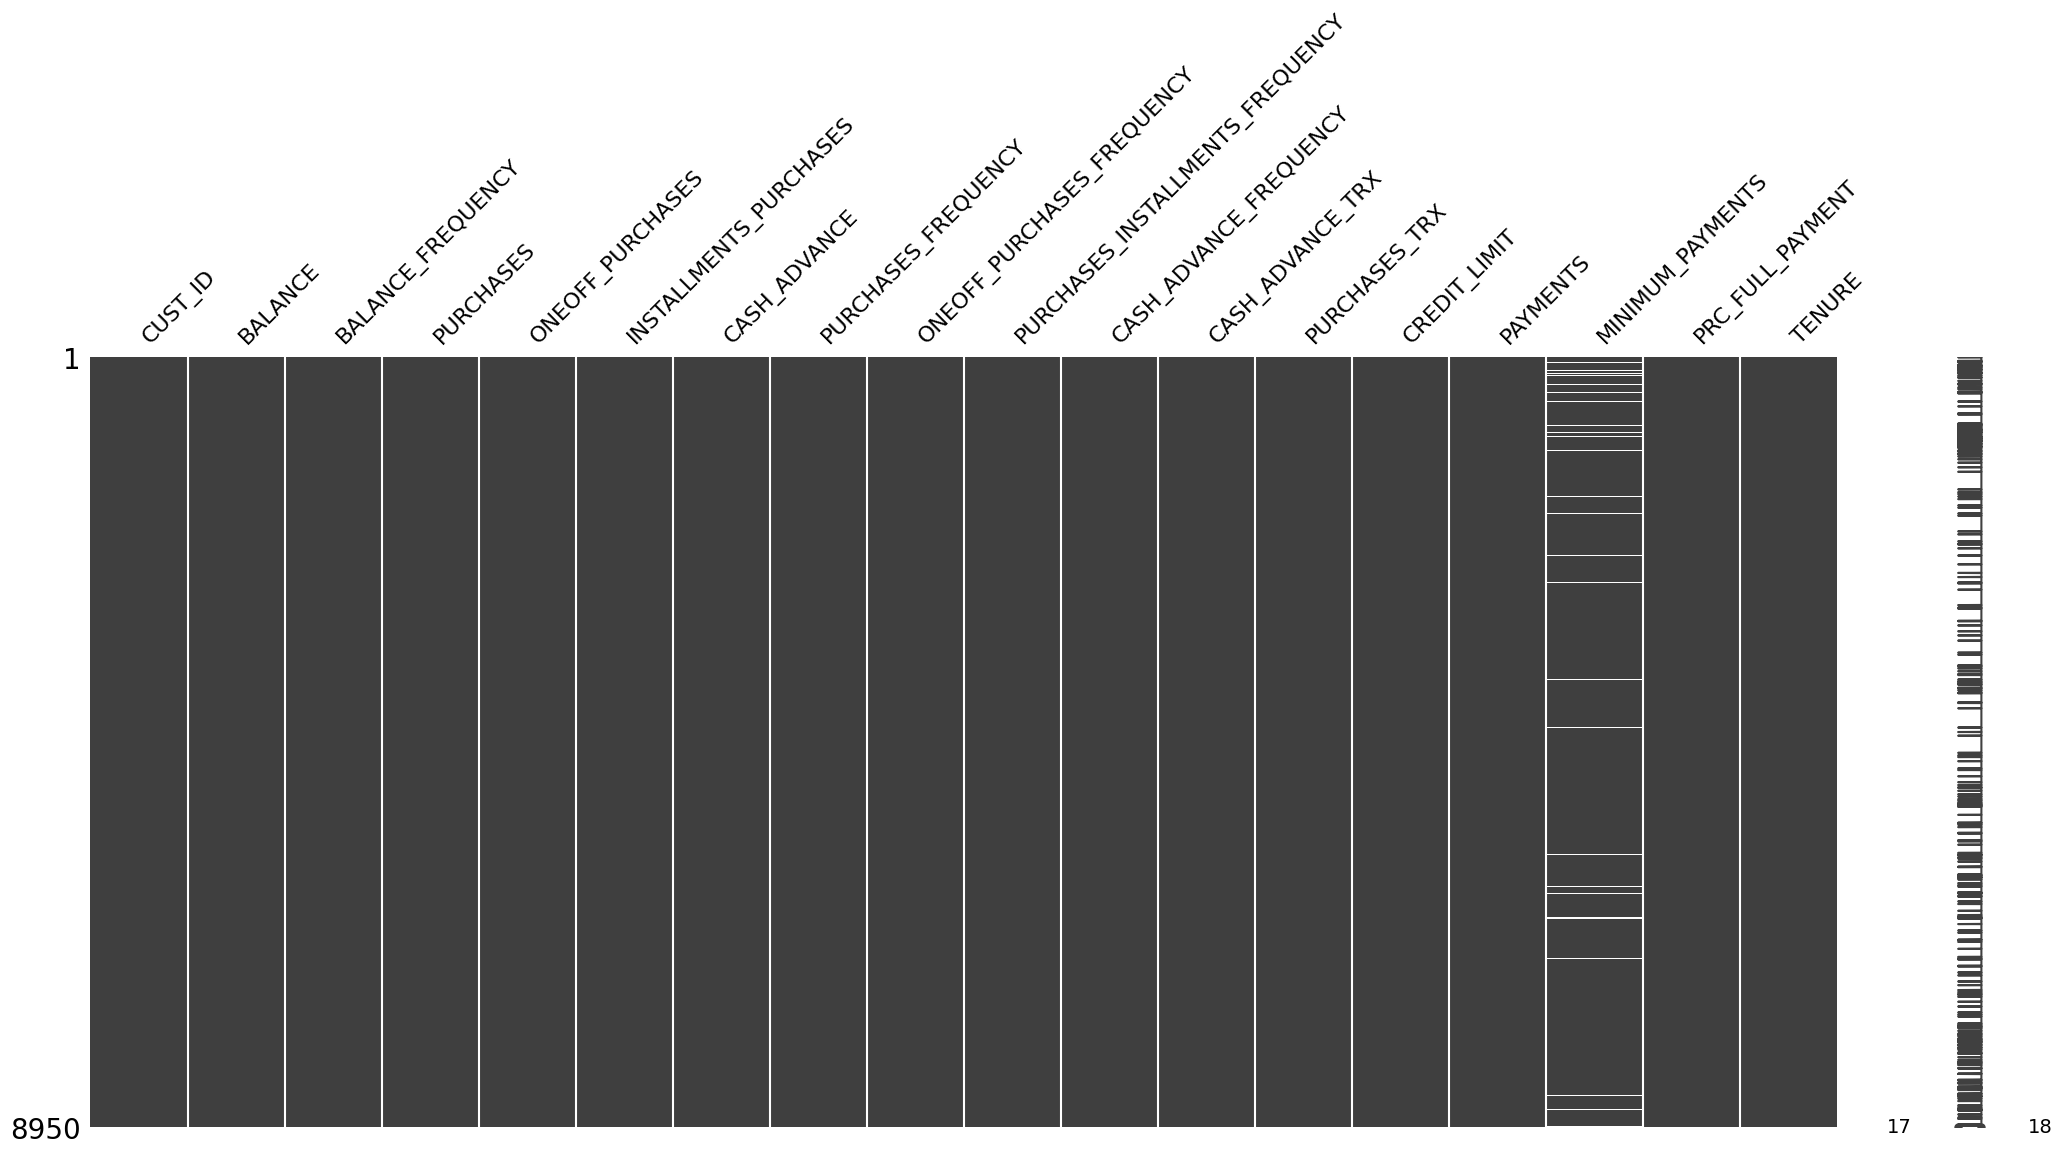

In [11]:
# Save Plot
plt.savefig("msno_matrix.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

msno.matrix(df);

In [12]:
df.duplicated().sum()

0

In [13]:
#Handling mssing value
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [14]:
#Mengecek nilai nilai yang kosong
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
#Memberikan ringkasan statistik tentang kolom kolom numerik dalam dataframe
df_c.describe()

Missing_Value
count      18.000000
mean       17.444444
std        73.761318
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       313.000000

In [16]:
#Menghapus kolom CUST_ID
df.drop(columns=["CUST_ID"], inplace=True)

df.head(5)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

## Exploration Data and Analysis (EDA)

In [17]:
# Identify number of columns by type

numerical_features = [feature for feature in df_c.columns if df_c[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df_c[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df_c.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(df_c[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 1
Discrete features Count 1
Continuous features Count 0
Categorical features Count 1
Binary Categorical features Count 1


In [18]:
# Menghasilkan DataFrame df_corr yang berisi matriks korelasi antar kolom dalam df.
df.corr

<bound method DataFrame.corr of           BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1    

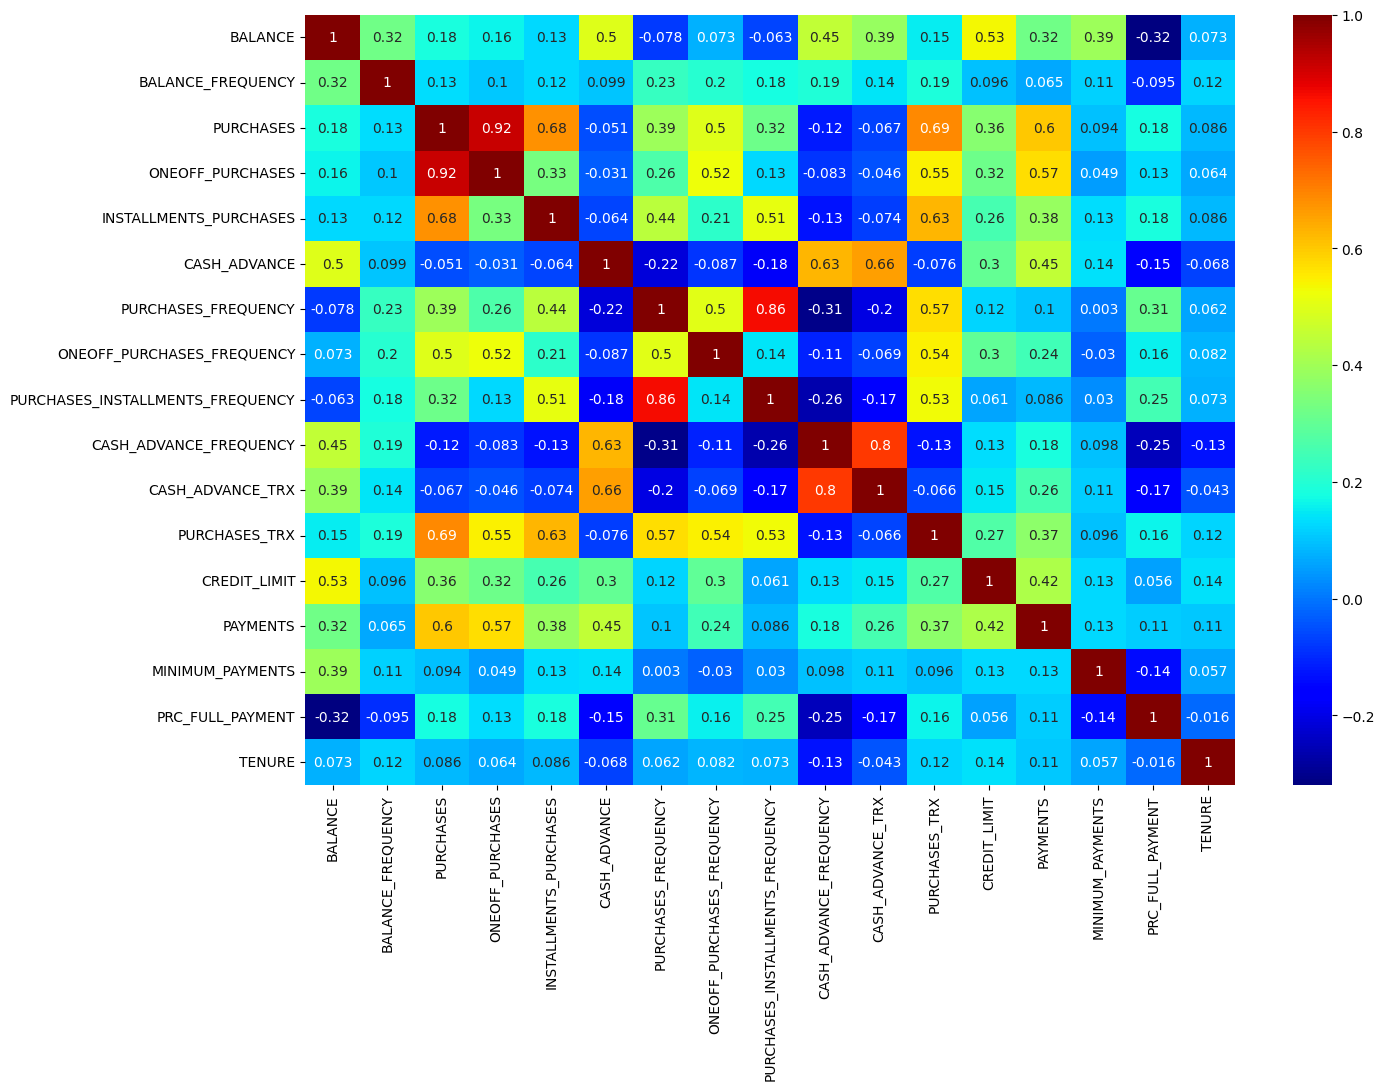

In [19]:
# Membuat heatmap dari matriks korelasi
data_corr=df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(data_corr, annot=True,cmap='jet')

# Save Plot
plt.savefig("corr_chart.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

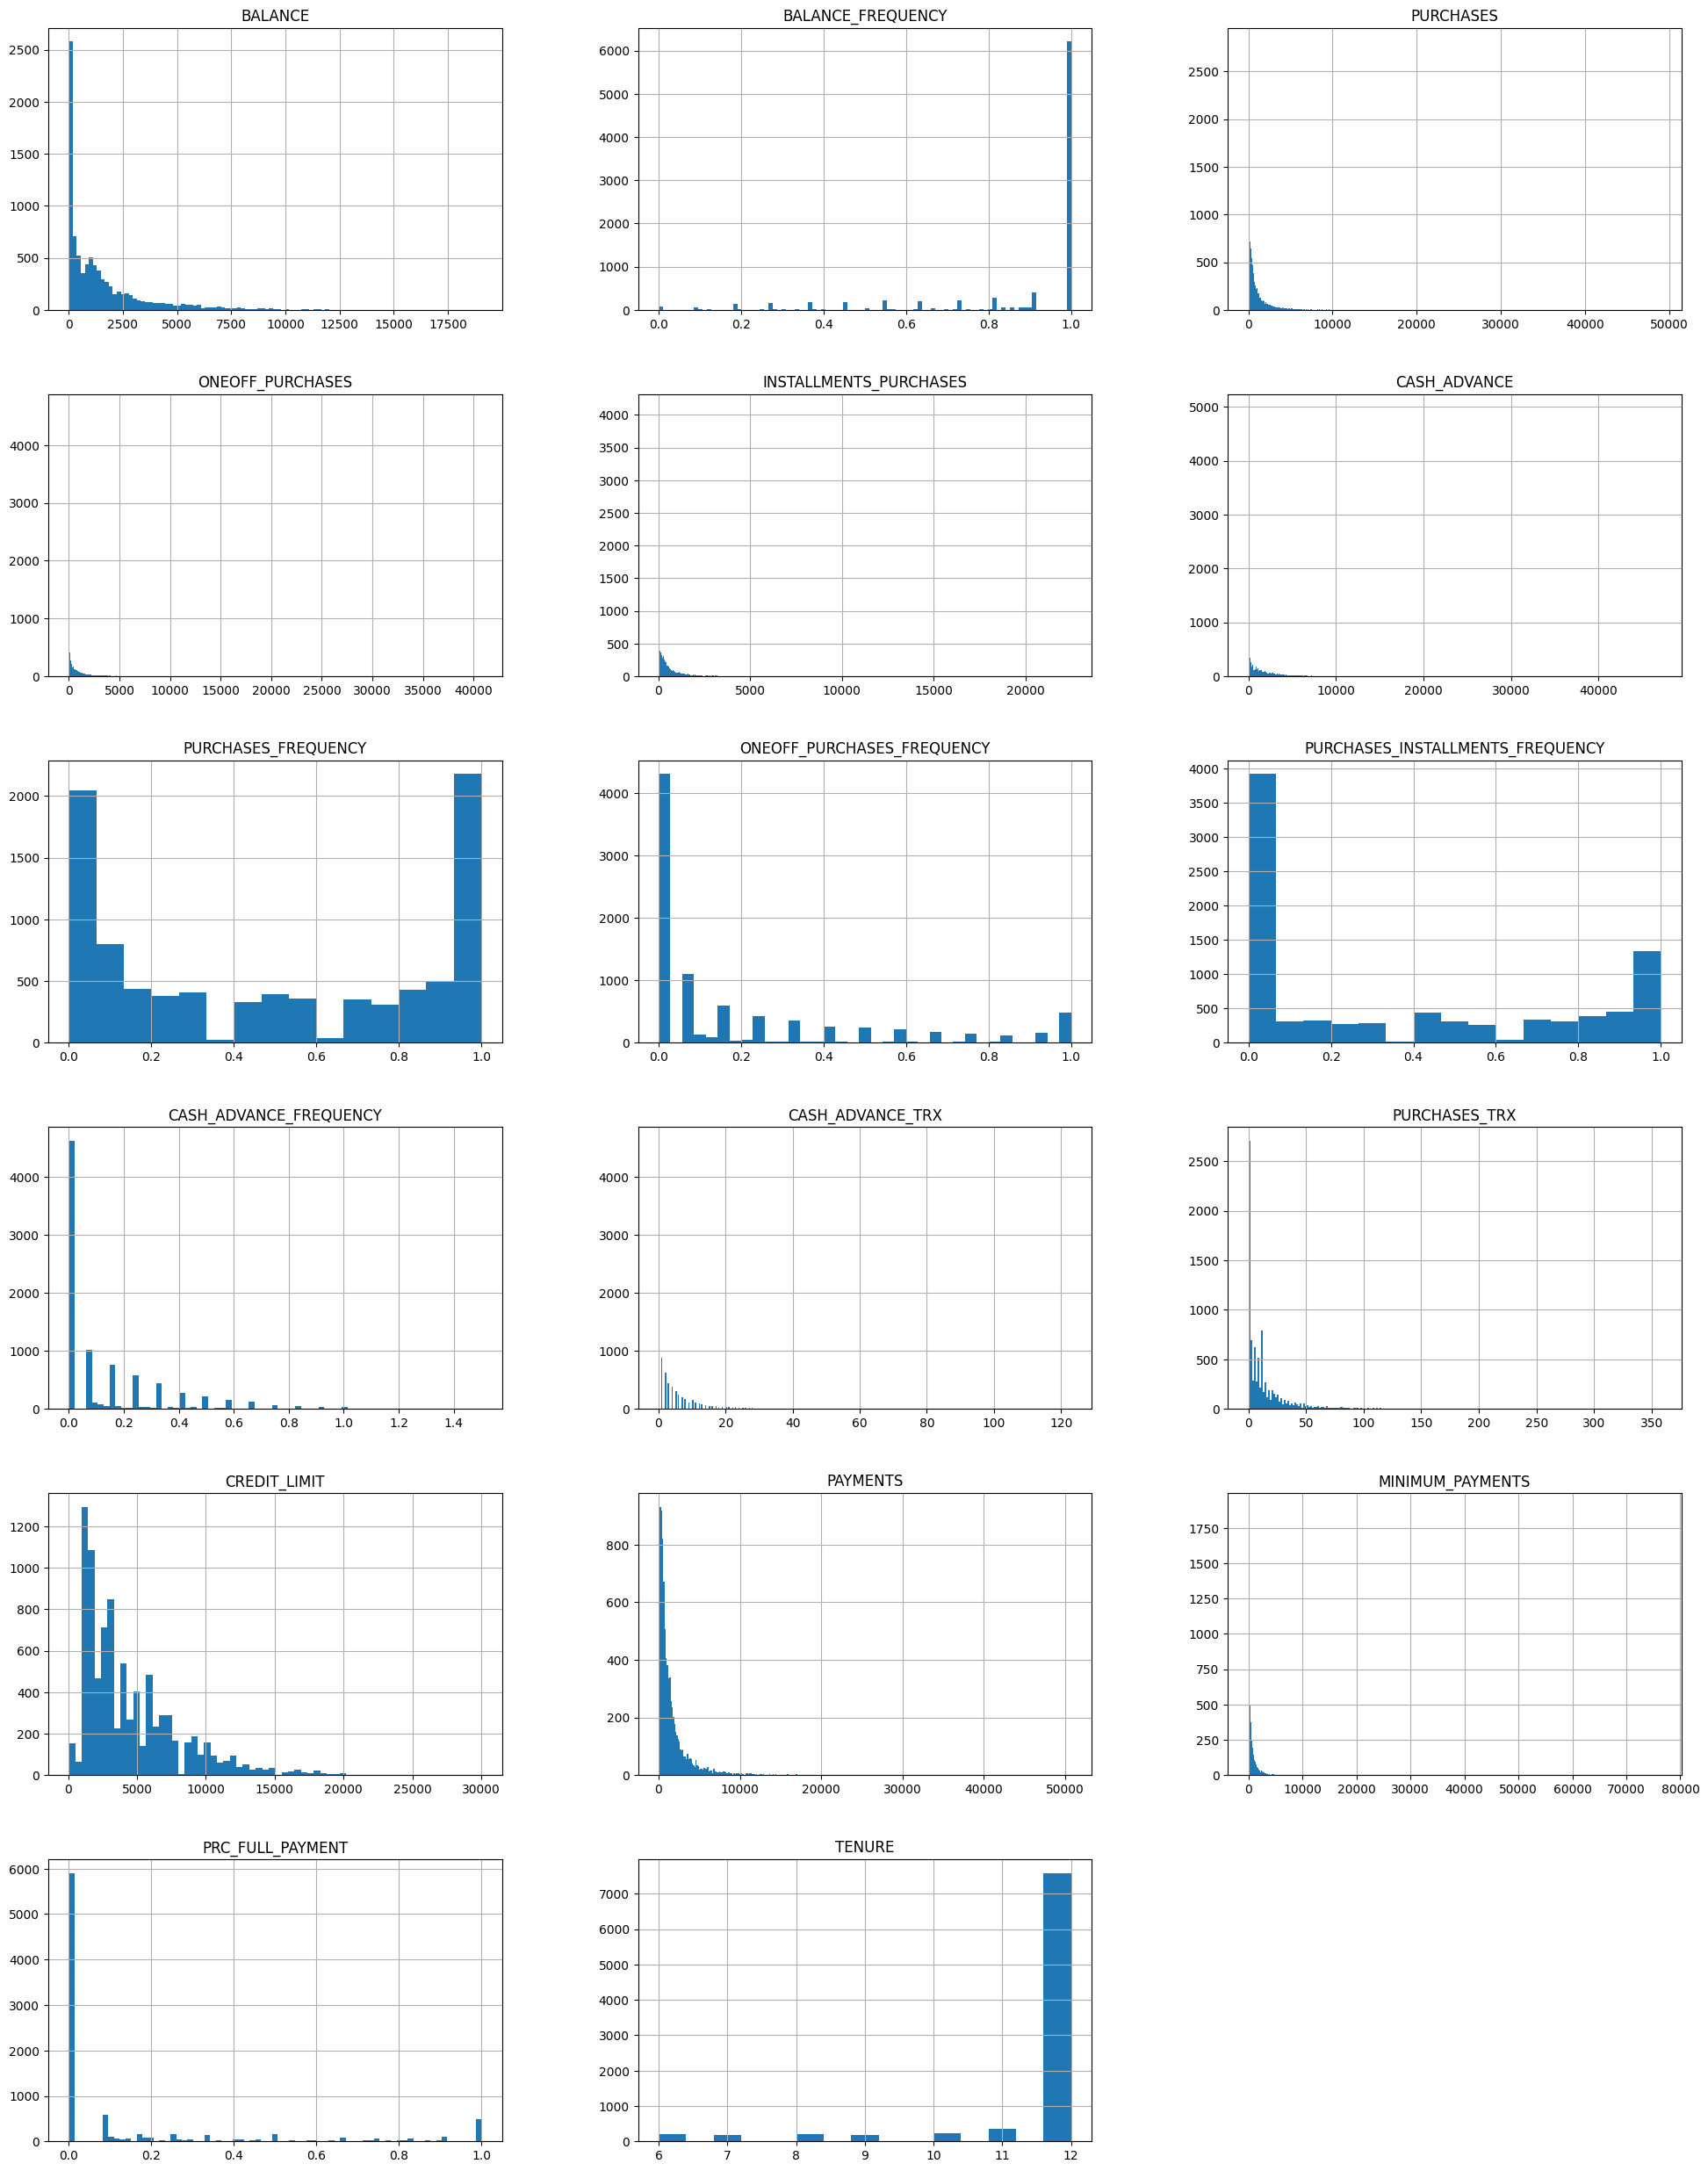

In [20]:
# Melihat distribusi frekuensi
df.hist(bins='auto',layout=(15,3), figsize=(24,80));
# Save Plot
plt.savefig("hist_dist.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

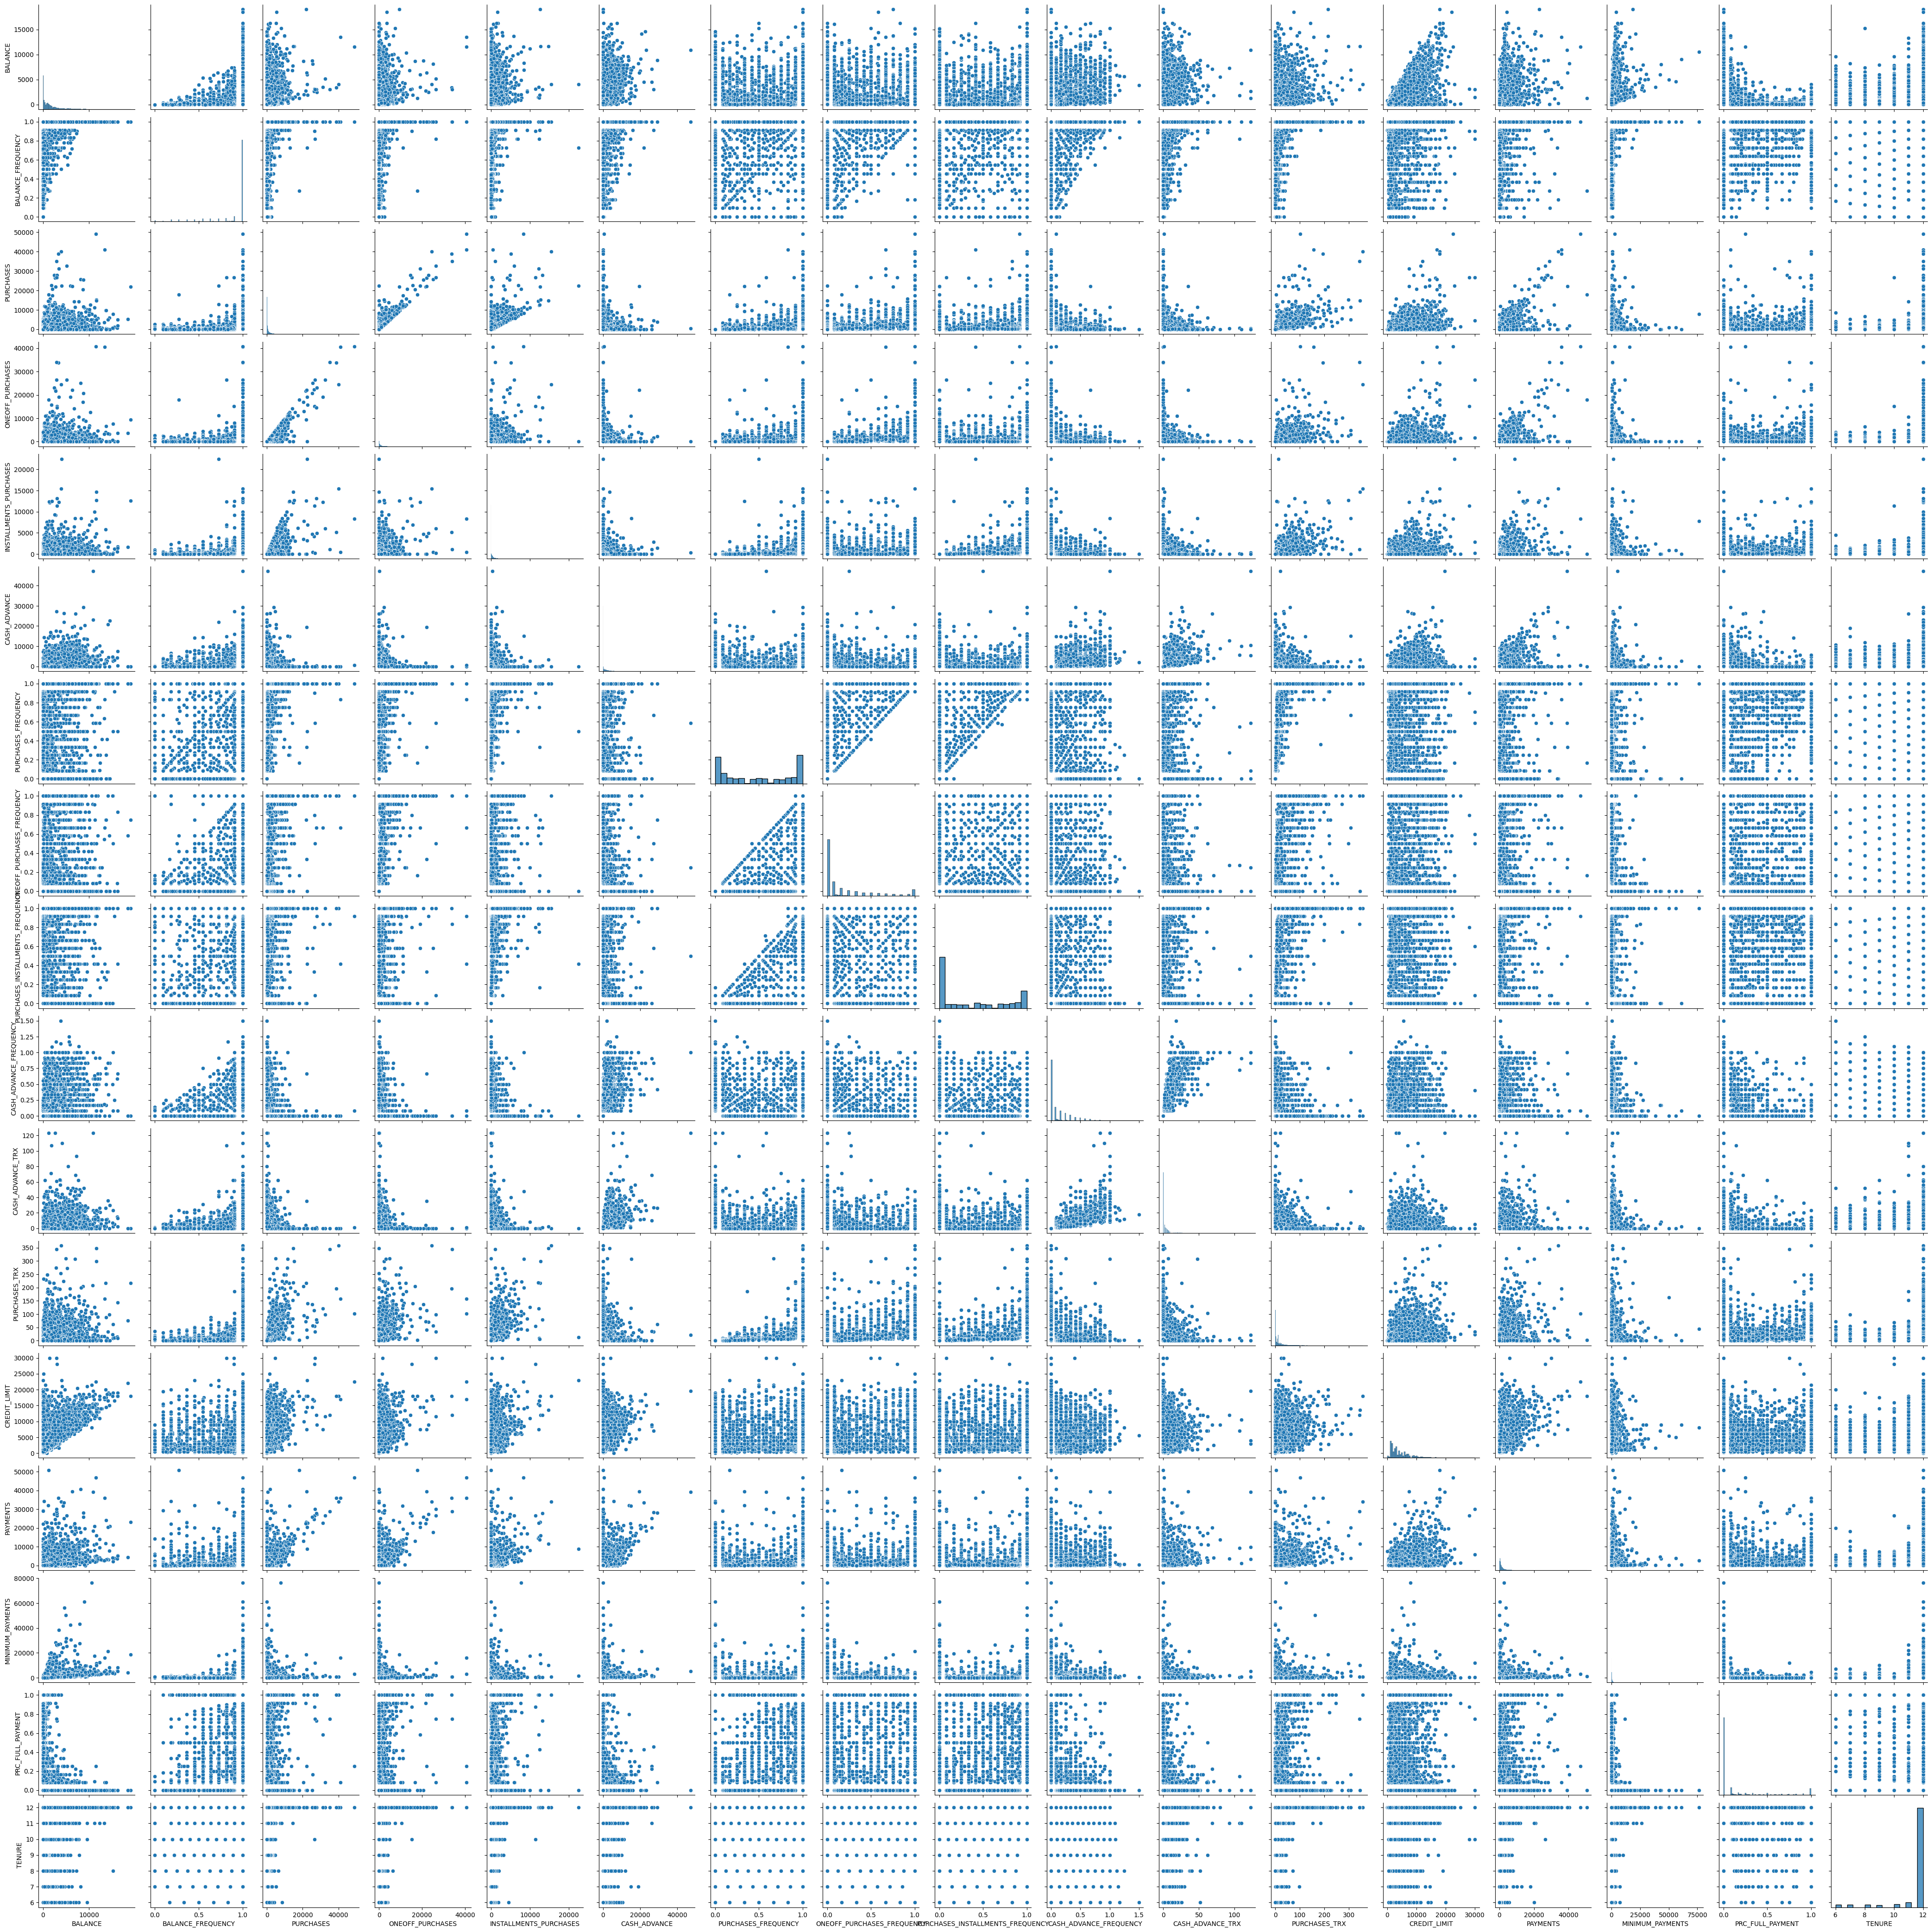

In [21]:
#Melihat tampilan scatter plot pada dataframe
sns.pairplot(df)

# Data Preprocessing

In [22]:
#Mmbuat salinan DataFrame df ke dalam tiga variabel yang berbeda, yaitu df_deploy, df_uji, dan df_copy.
df_deploy = df.copy()
df_copy = df.copy()


In [23]:
#Scalling data
a = [i for i in df.columns]

In [24]:
scaler = StandardScaler()
df[a] = scaler.fit_transform(df[a])
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960433   
1                0.573963          0.110074      -0.591796      0.688639   
2               -0.675349         -0.476070      -0.109020      0.826062   
3               -0.258913         -0.329534      -0.551565      0.826062   
4               -0.675349         -0.476070      -0.551565     -0.905464   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
0 -0.528979     -3.109675e-01         -0.525551  0.36068  
1  0.818642      8.931021e-02          0.234227  0.36068  
2 -0.383805     -1.016632e-01         -0.525551  0.36068  
3 -0.598688      4.878305e-17         -0.525551  0.36068  
4 -0.364368     -2.657913e-01         -0.525551  0.36068

K-Means

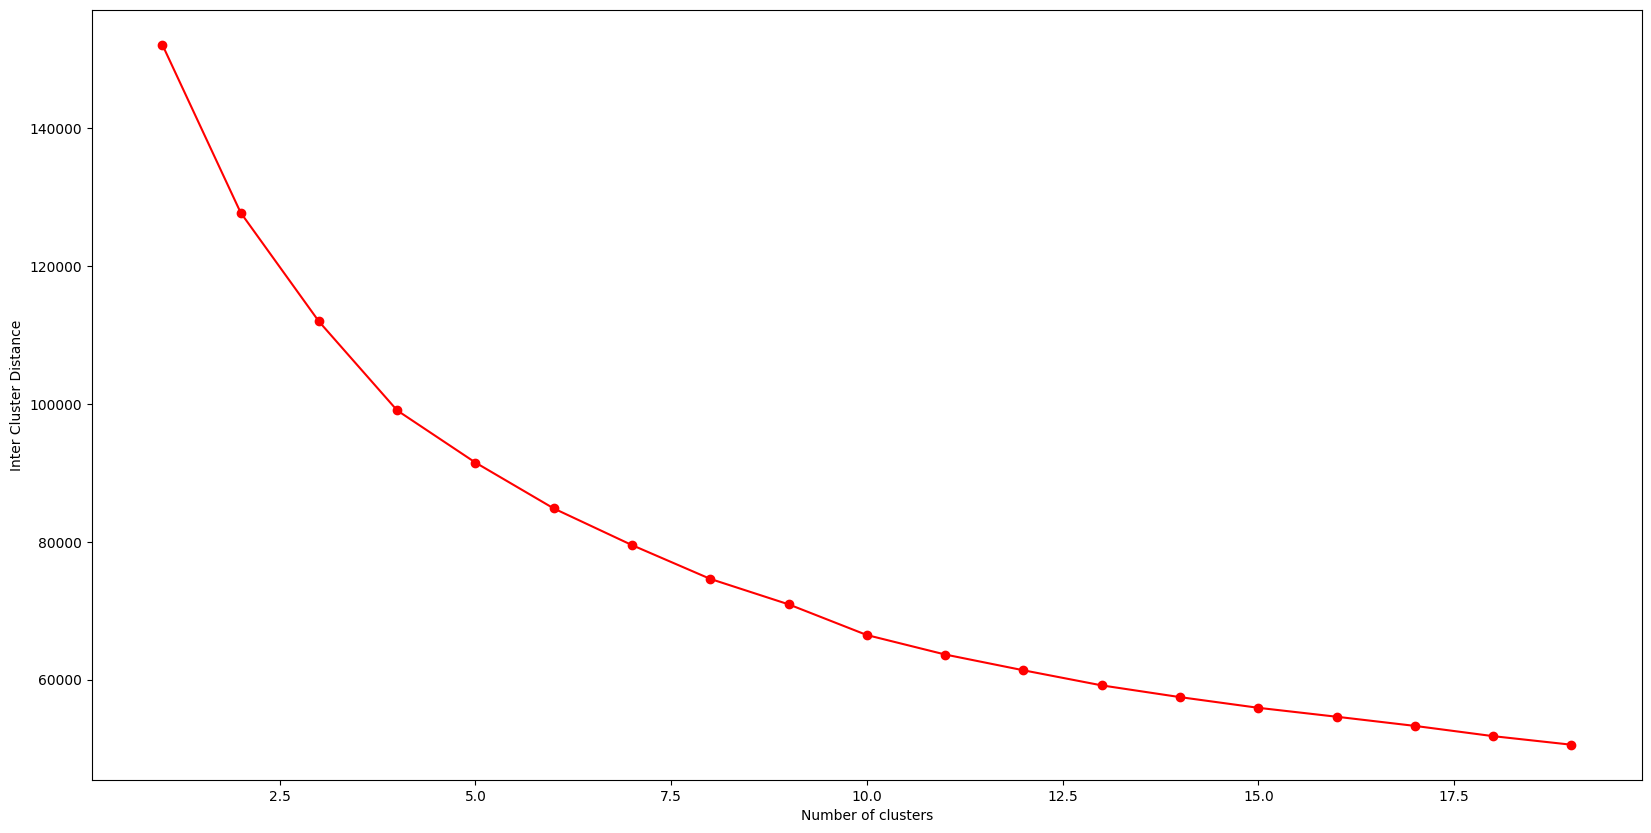

<Figure size 640x480 with 0 Axes>

In [25]:
interclusterdistance = []

for clusters in range(1,20):
    km = KMeans(n_clusters = clusters,init ='k-means++', max_iter=300,random_state=40)
    km.fit(df)
    interclusterdistance.append(km.inertia_)
    
#plotting the values
plt.figure(figsize=(20,10))
plt.plot(range(1, 20), interclusterdistance, marker='o', color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Inter Cluster Distance')
plt.show()

# Save Plot
plt.savefig("kmeans_graph_1.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

In [26]:
kmeans = KMeans(n_clusters = 8,init ='k-means++', max_iter=300,random_state=35)
model1=kmeans.fit(df)
y_pred = kmeans.predict(df)
y_pred

array([6, 0, 4, ..., 7, 7, 7])

In [27]:
clus_df = pd.DataFrame(df,columns = df.columns)
clus_df['CLUSTERS'] = y_pred
clus_df.head(8)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   
5  0.117878           0.518084   0.154492         -0.356934   
6 -0.450277           0.518084   2.849408          3.500548   
7  0.124520           0.518084  -0.265388         -0.356934   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   
5                1.019822     -0.466786             0.439310   
6                0.306664     -0.466786             1.269843   
7                0.027792     -0.466786             1.269843   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   
5                   -0.678661                          0.550784   
6                    2.673451                          1.599199   
7                   -0.678661                          1.599199   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960433   
1                0.573963          0.110074      -0.591796      0.688639   
2               -0.675349         -0.476070      -0.109020      0.826062   
3               -0.258913         -0.329534      -0.551565      0.826062   
4               -0.675349         -0.476070      -0.551565     -0.905464   
5               -0.675349         -0.476070      -0.269945     -0.740557   
6               -0.675349         -0.476070       1.983008      2.475134   
7               -0.675349         -0.476070      -0.109020     -0.603134   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  CLUSTERS  
0 -0.528979     -3.109675e-01         -0.525551  0.36068         6  
1  0.818642      8.931021e-02          0.234227  0.36068         0  
2 -0.383805     -1.016632e-01         -0.525551  0.36068         4  
3 -0.598688      4.878305e-17         -0.525551  0.36068         6  
4 -0.364368     -2.657913e-01         -0.525551  0.36068         6  
5 -0.115060      6.621186e-01         -0.525551  0.36068         1  
6  1.596313     -2.858411e-01          2.893453  0.36068         2  
7 -0.364116     -1.425353e-01         -0.525551  0.36068         1

In [28]:
clus_df['CLUSTERS'].value_counts()

6    2722
1    2004
3    1182
4    1102
0     868
7     622
2     420
5      30
Name: CLUSTERS, dtype: int64

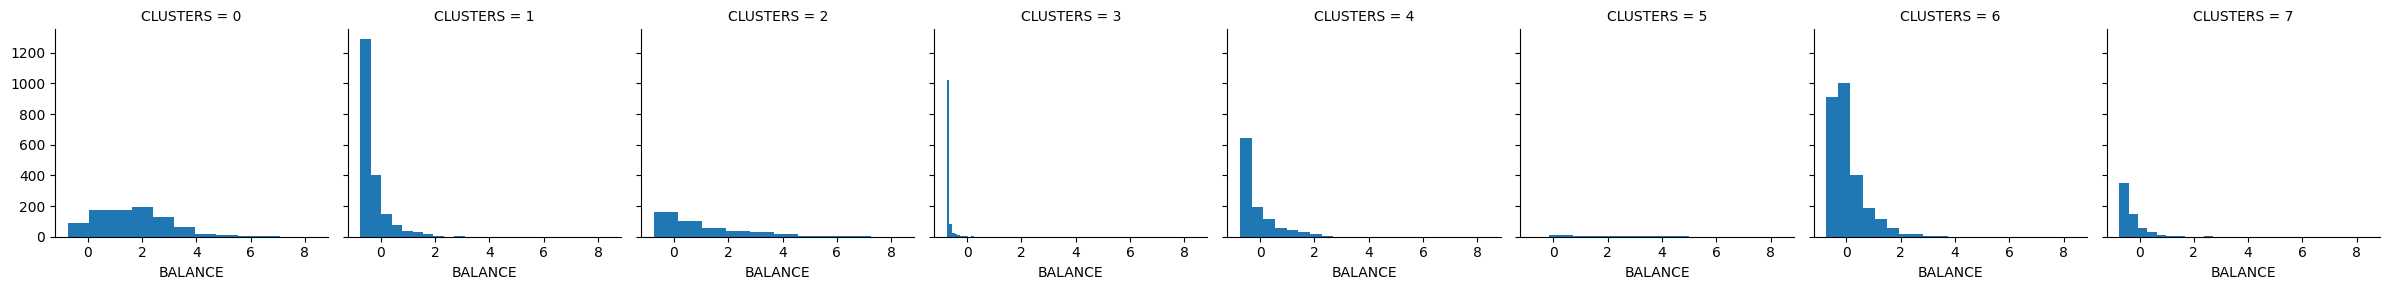

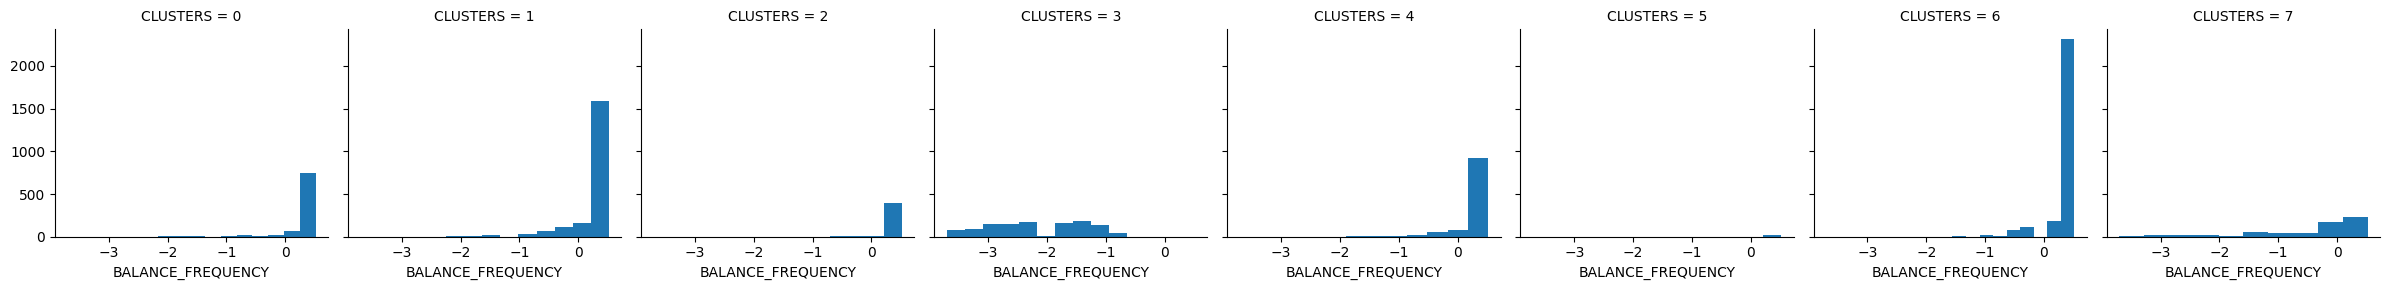

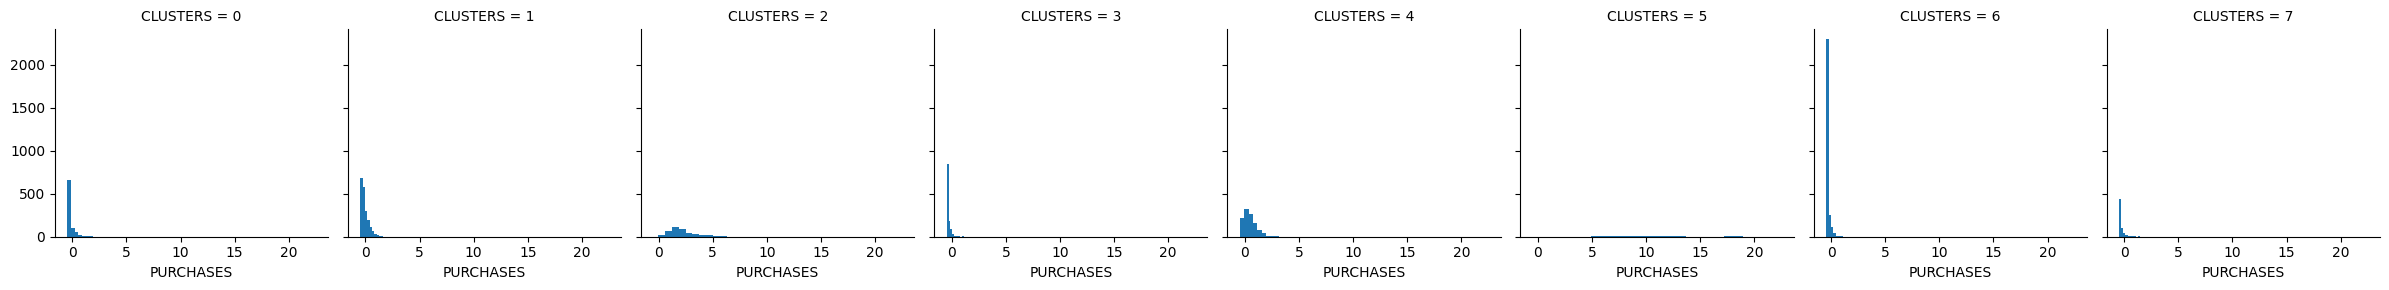

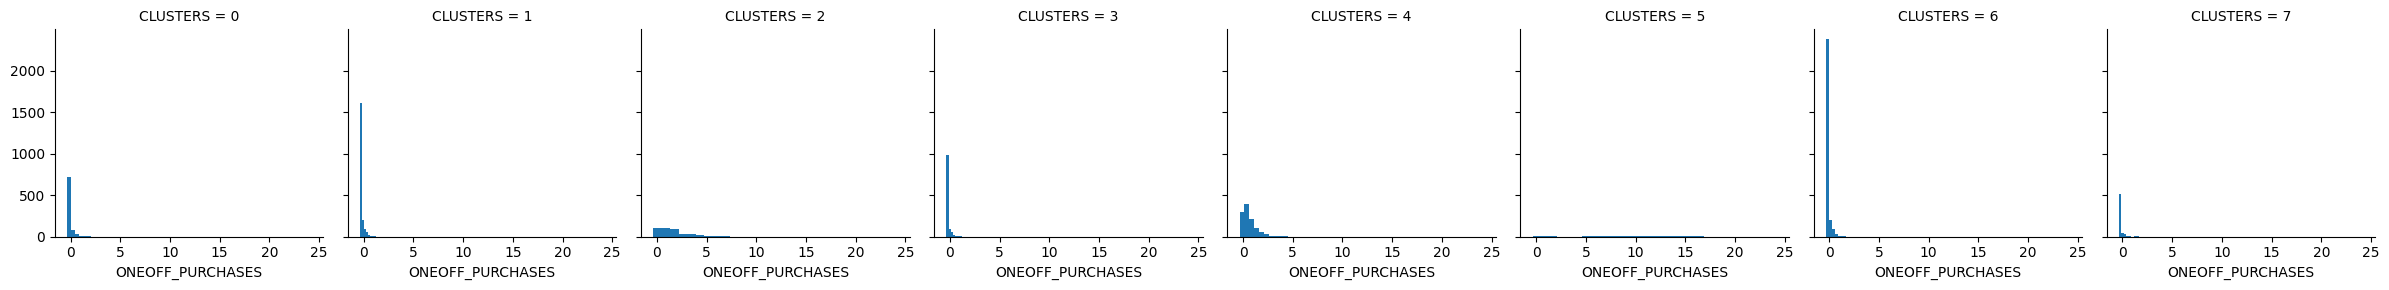

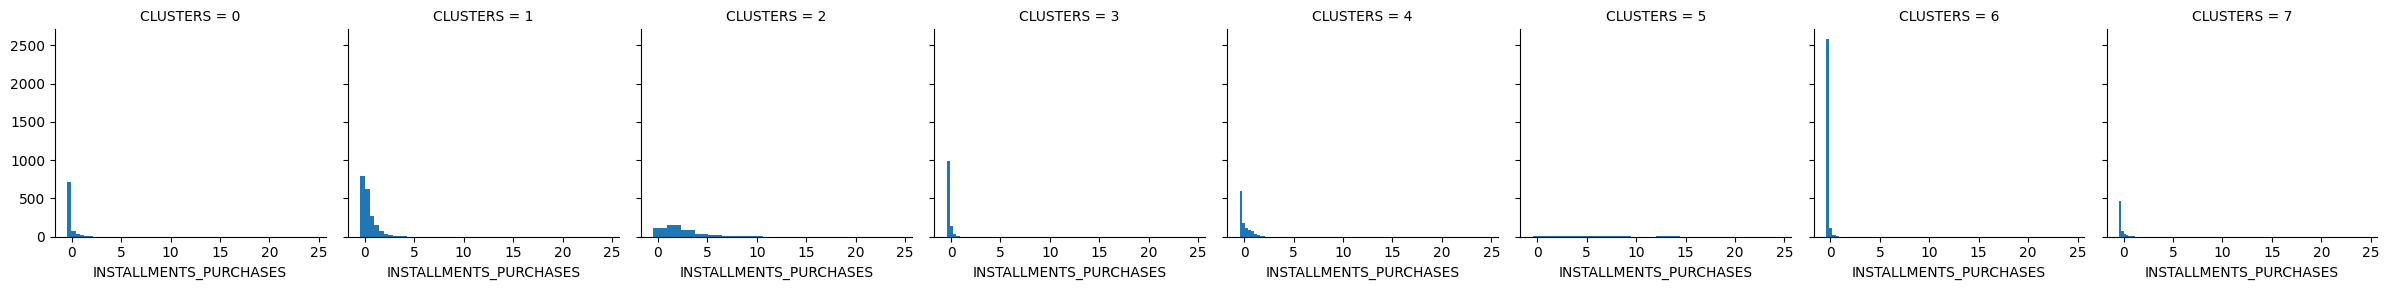

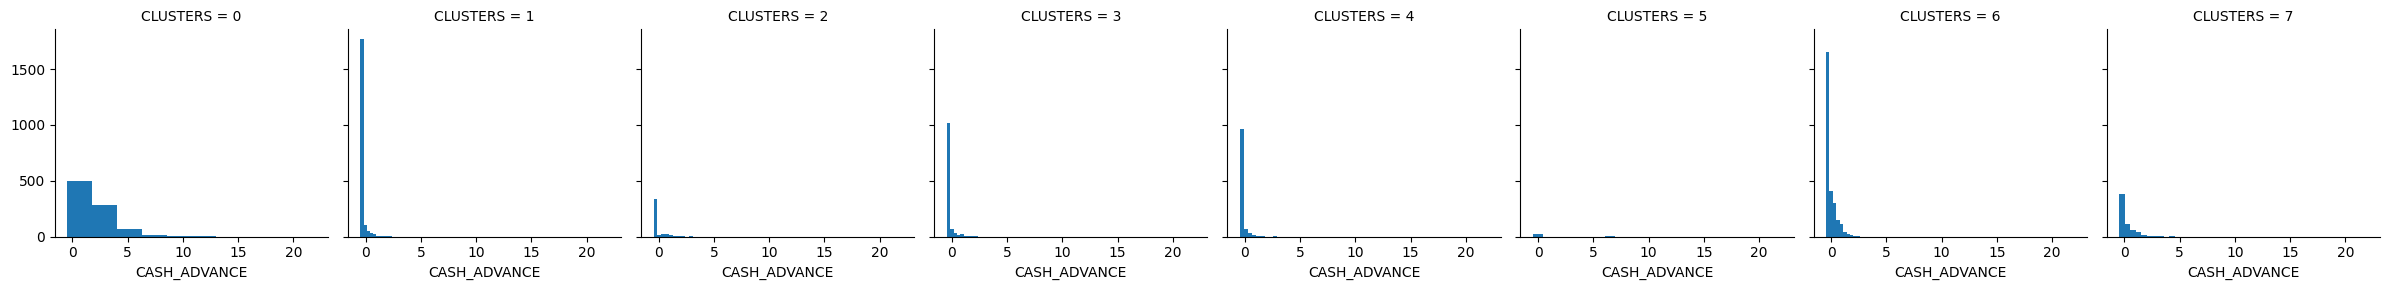

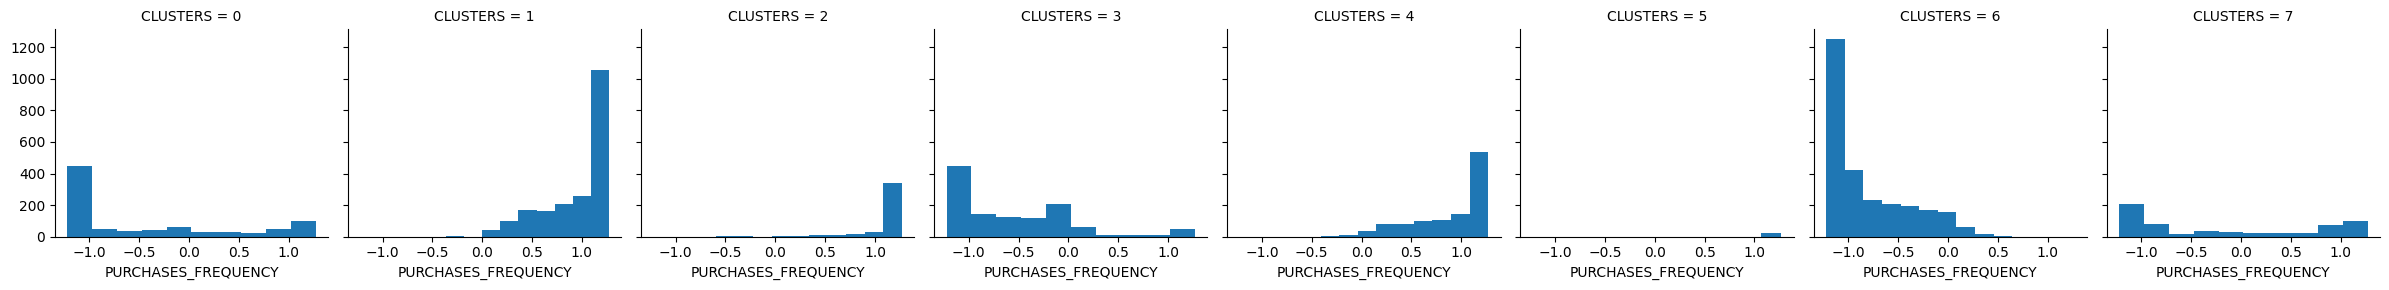

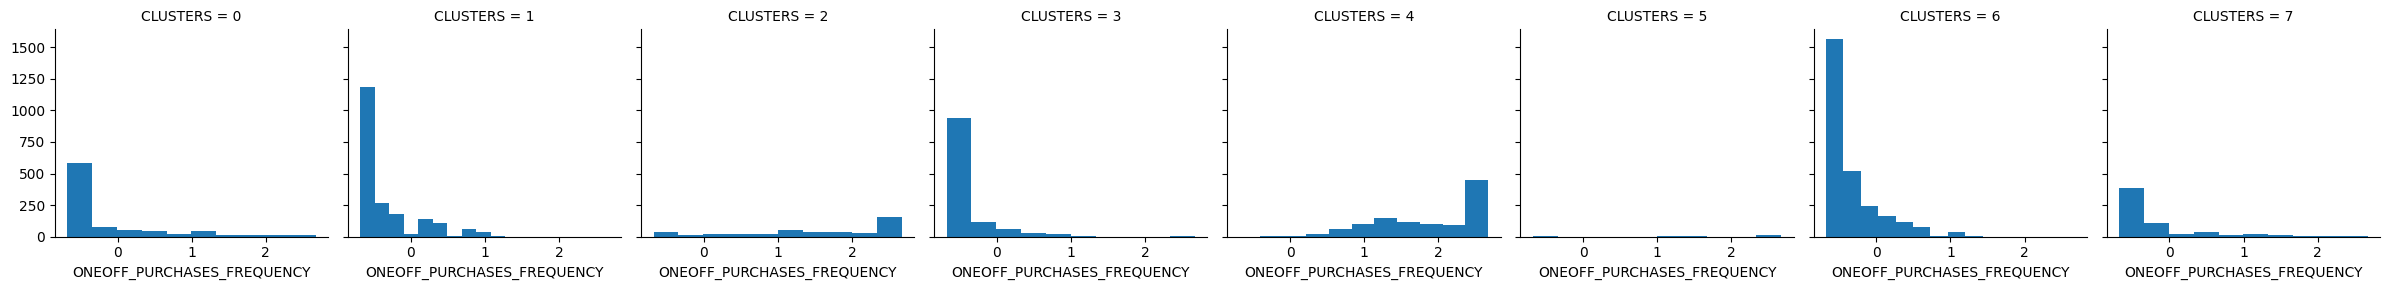

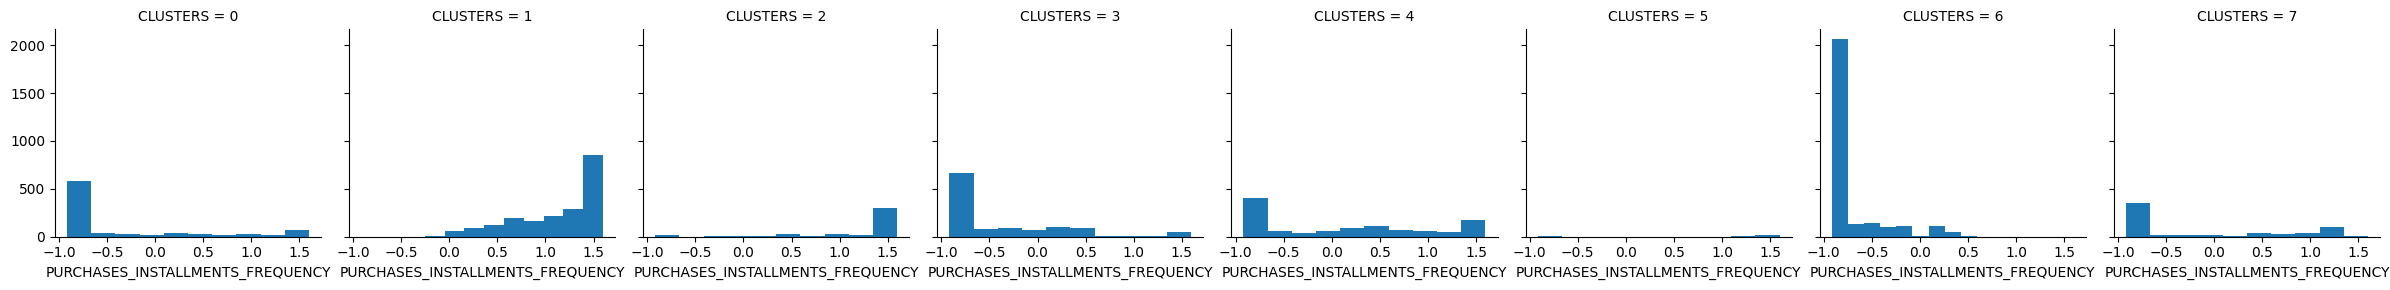

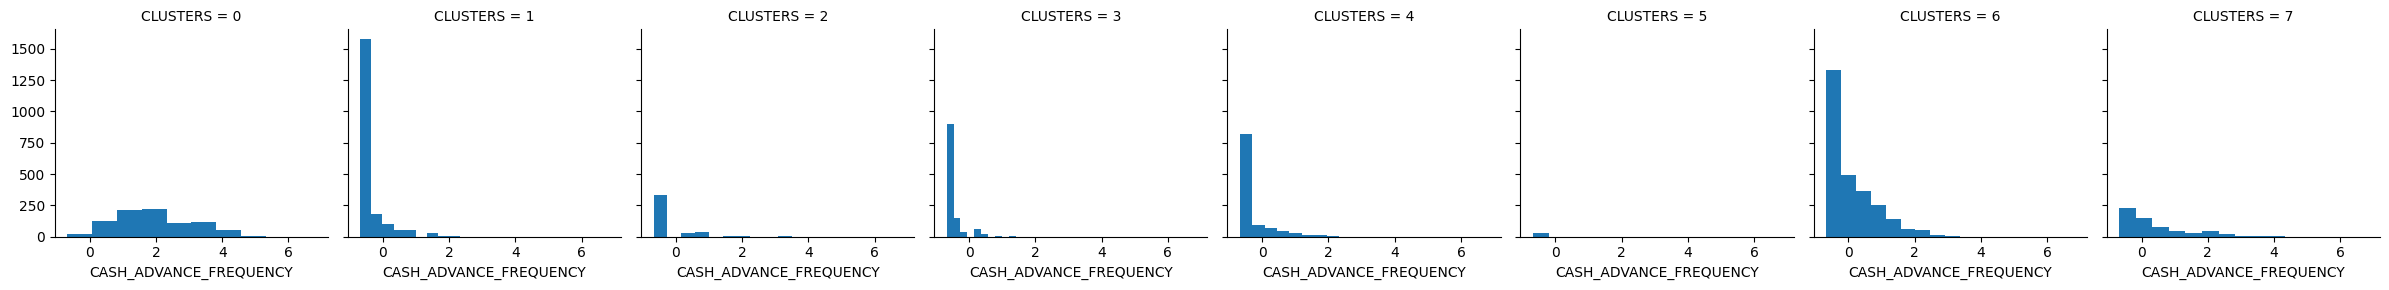

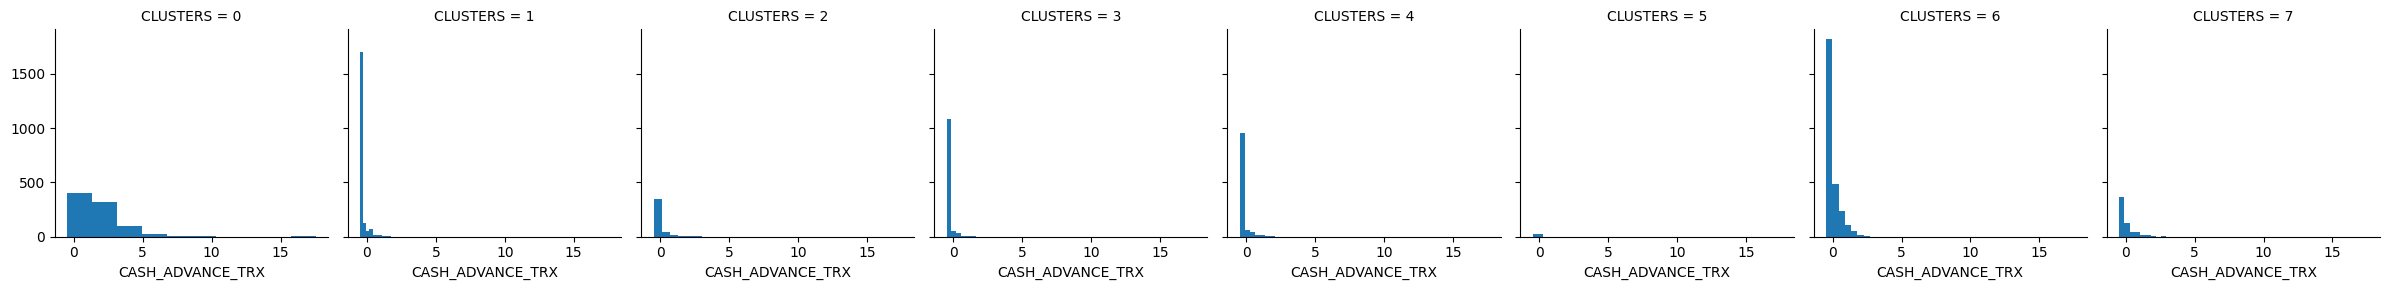

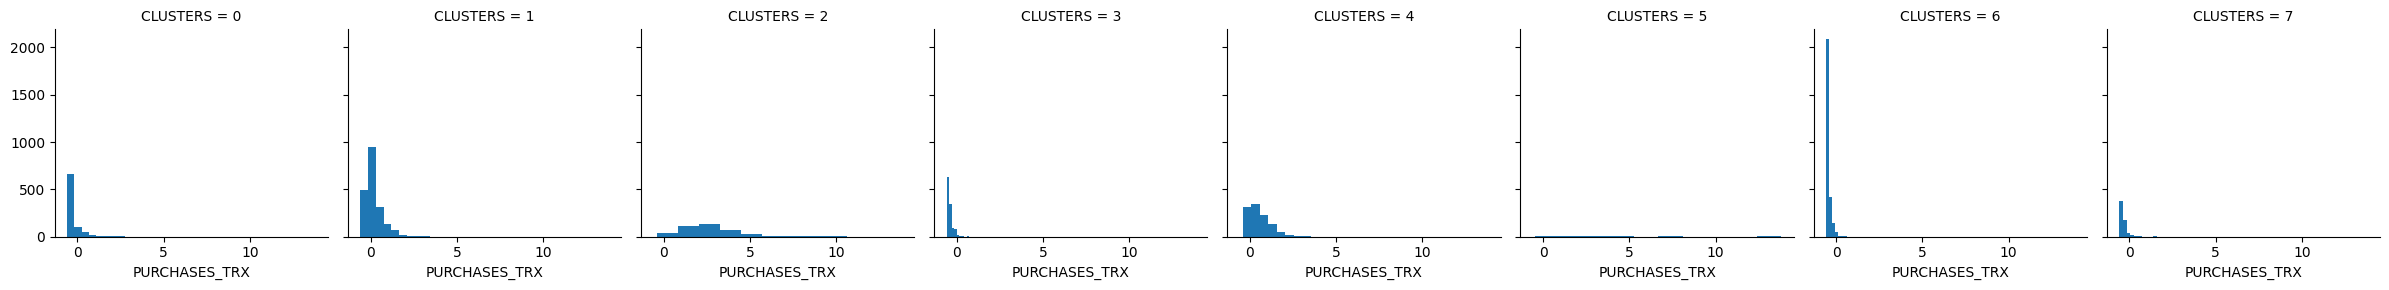

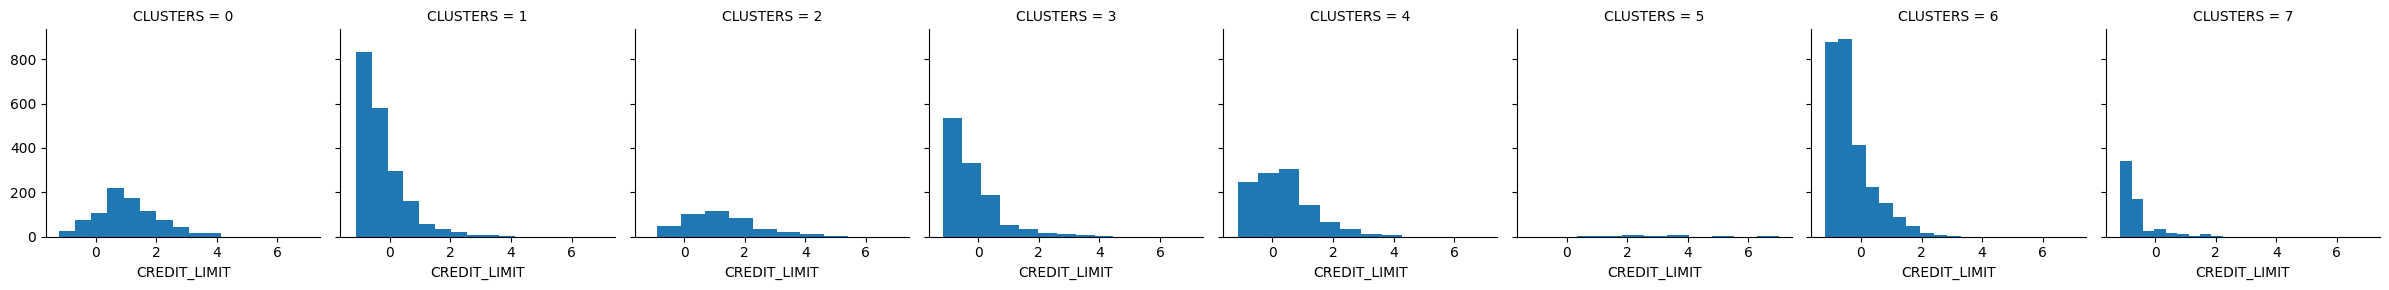

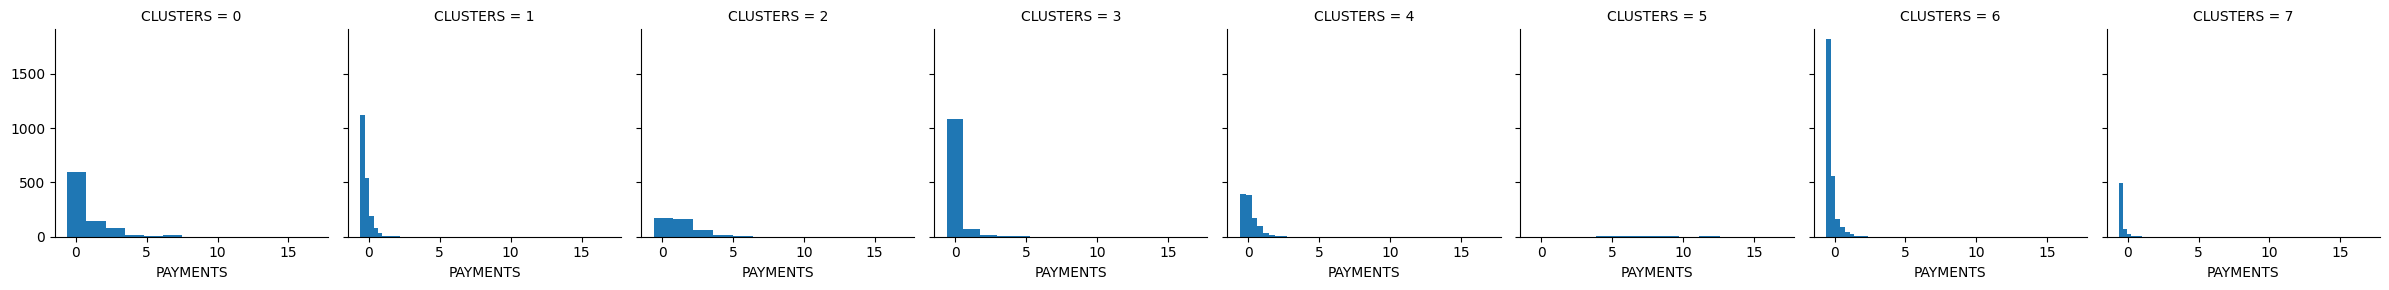

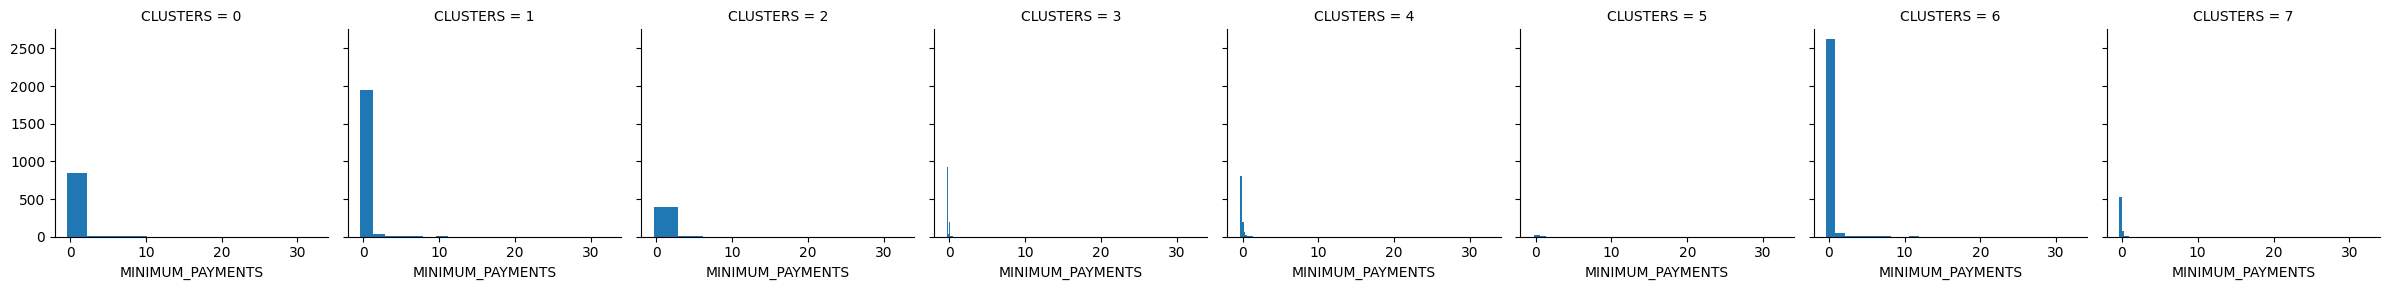

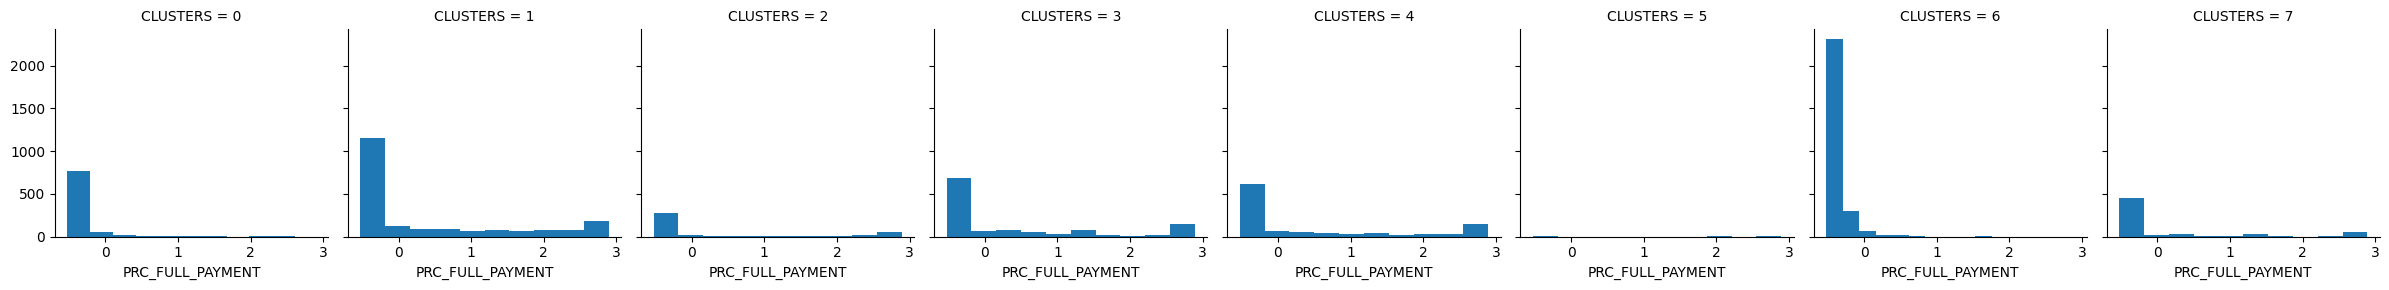

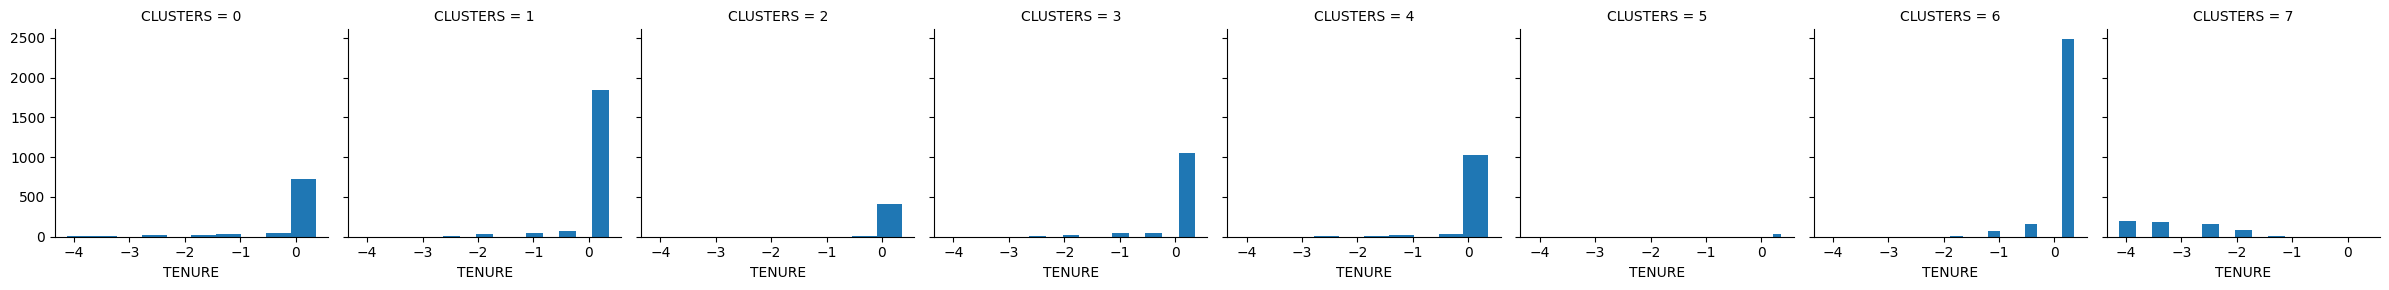

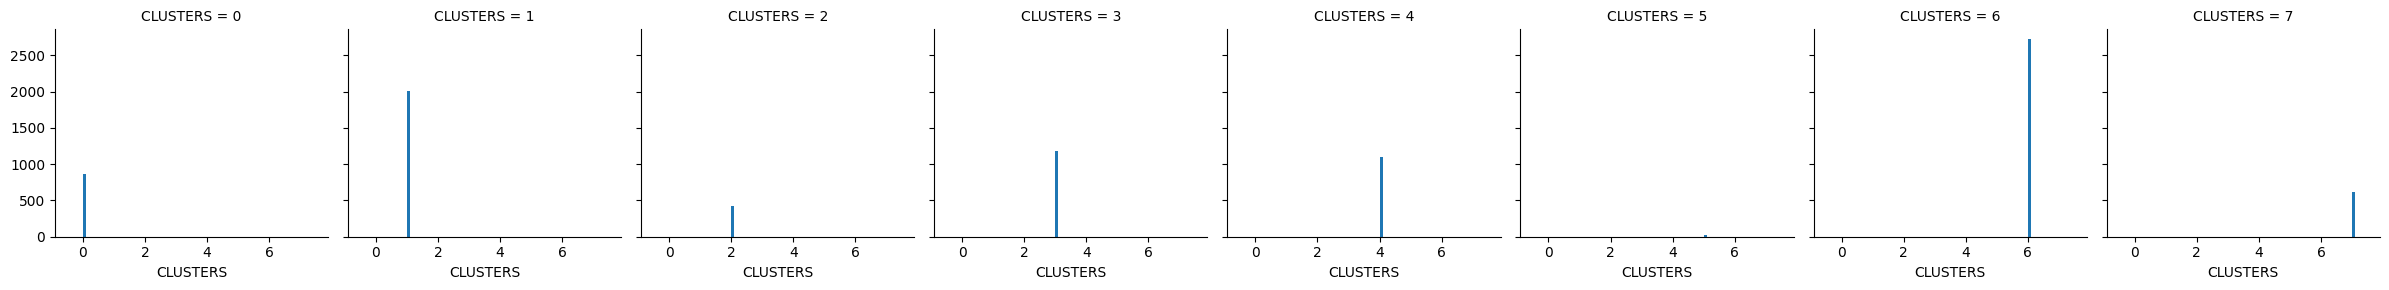

In [29]:
#Membuat histogram untuk setiap kolom dalam DataFrame clus_df berdasarkan kolom 'CLUSTERS' menggunakan seaborn dan matplotlib.
for c in clus_df:
    grid= sns.FacetGrid(clus_df, col='CLUSTERS')
    grid.map(plt.hist, c)

# Save Plot
plt.savefig("kmeans_clust.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')


In [30]:
#Membuat variabel X yang merupakan array NumPy yang terdiri dari beberapa kolom dibawah ini
X = clus_df[['BALANCE','PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'TENURE','PRC_FULL_PAYMENT']].to_numpy()


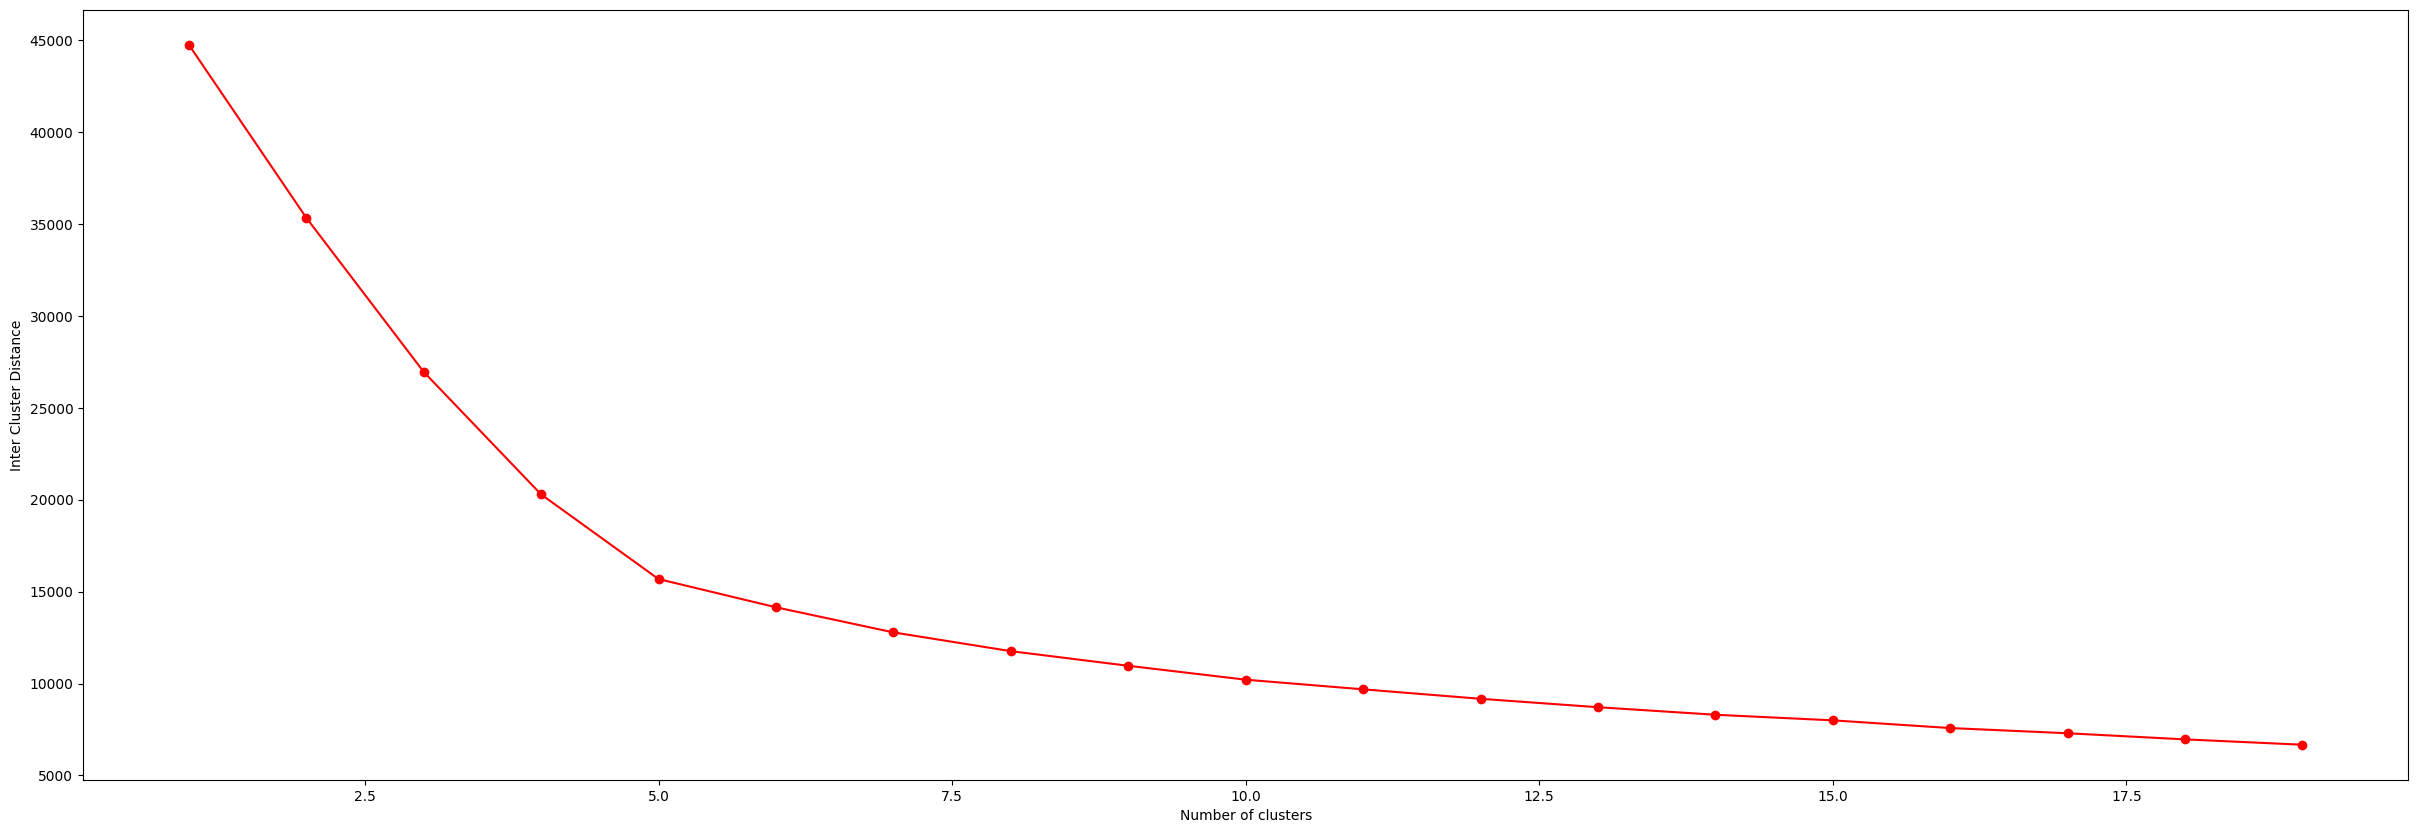

<Figure size 640x480 with 0 Axes>

In [31]:
interclusterdistance = []

for clusters in range(1,20):
    km = KMeans(n_clusters = clusters,init ='k-means++', max_iter=300,random_state=42)
    km.fit(X)
    interclusterdistance.append(km.inertia_)
    
#plotting the values
plt.figure(figsize=(30,10))
plt.plot(range(1, 20), interclusterdistance, marker='o', color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Inter Cluster Distance')
plt.show()

# Save Plot
plt.savefig("kmeans_graph_2.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

In [32]:
#Menggunakan algoritma K-means untuk mengklasterisasi data yang terdapat dalam array X
km = KMeans(n_clusters = 8,init ='k-means++', max_iter=300,random_state=42)
model2=km.fit(X)
y_balance_pred = km.predict(X)


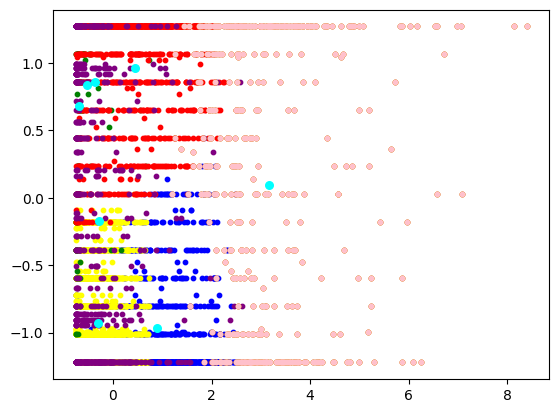

<Figure size 640x480 with 0 Axes>

In [33]:
#visualisasi hasil klasterisasi menggunakan scatter plot
plt.scatter(X[y_balance_pred==0, 0], X[y_balance_pred==0, 1], s=10, c='blue', label ='Cluster 1')
plt.scatter(X[y_balance_pred==1, 0], X[y_balance_pred==1, 1], s=10, c='yellow', label ='Cluster 2')
plt.scatter(X[y_balance_pred==2, 0], X[y_balance_pred==2, 1], s=10, c='green', label ='Cluster 3')
plt.scatter(X[y_balance_pred==3, 0], X[y_balance_pred==3, 1], s=10, c='red', label ='Cluster 4')
plt.scatter(X[y_balance_pred==4, 0], X[y_balance_pred==4, 1], s=10, c='purple', label ='Cluster 5')
plt.scatter(X[y_balance_pred==5, 0], X[y_balance_pred==5, 1], s=10, c='brown', label ='Cluster 6')
plt.scatter(X[y_balance_pred==5, 0], X[y_balance_pred==5, 1], s=10, c='orange', label ='Cluster 7')
plt.scatter(X[y_balance_pred==5, 0], X[y_balance_pred==5, 1], s=10, c='pink', label ='Cluster 8')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=30, c='cyan', label = 'Centroids')
plt.show()

# Save Plot
plt.savefig("kmeans_graph_3.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

DBSCAN

In [34]:
df_scaled = normalize(df_copy)
df_scaled = pd. DataFrame(df_scaled, columns=df_copy.columns)
df_scaled.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.039353           0.000787   0.091790          0.000000   
1  0.293876           0.000083   0.000000          0.000000   
2  0.310798           0.000125   0.096307          0.096307   
3  0.207829           0.000079   0.186921          0.186921   
4  0.504284           0.000617   0.009867          0.009867   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.09179      0.000000             0.000160   
1                 0.00000      0.591240             0.000000   
2                 0.00000      0.000000             0.000125   
3                 0.00000      0.025661             0.000010   
4                 0.00000      0.000000             0.000051   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                           0.00008   
1                    0.000000                           0.00000   
2                    0.000125                           0.00000   
3                    0.000010                           0.00000   
4                    0.000051                           0.00000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000          0.000000       0.001924      0.962156   
1                0.000023          0.000367       0.000000      0.642358   
2                0.000000          0.000000       0.001495      0.934206   
3                0.000010          0.000125       0.000125      0.935229   
4                0.000000          0.000000       0.000617      0.740040   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0  0.194165          0.134230           0.00000  0.011546  
1  0.376516          0.098404           0.00002  0.001101  
2  0.077485          0.078135           0.00000  0.001495  
3  0.000000          0.107764           0.00000  0.001496  
4  0.418329          0.150963           0.00000  0.007400

In [35]:
dbscan = DBSCAN(eps=2,min_samples=6)
df_dbscan= dbscan.fit(df_scaled)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
#Menggabungkan label klaster yang telah diprediksi y_dbscan_pred dengan DataFrame df_copy dalam DataFrame dbscan_. 
dbscan_ = pd.DataFrame(df_copy,columns = df_copy.columns)
dbscan_['CLUSTERS'] = y_dbscan_pred
dbscan_.head(10)


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   
6   627.260806           1.000000    7091.01           6402.63   
7  1823.652743           1.000000     436.20              0.00   
8  1014.926473           1.000000     861.49            661.49   
9   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTERS  
0   201.802084        139.509787          0.000000      12         0  
1  4103.032597       1072.340217          0.222222      12         0  
2   622.066742        627.284787          0.000000      12         0  
3     0.000000        864.206542          0.000000      12         0  
4   678.334763        244.791237          0.000000      12         0  
5  1400.057770       2407.246035          0.000000      12         0  
6  6354.314328        198.065894          1.000000      12         0  
7   679.065082        532.033990          0.000000      12         0  
8   688.278568        311.963409          0.000000      12         0  
9  1164.770591        100.302262          0.000000      12         0

In [37]:
dbscan_ = pd.DataFrame(df_copy,columns = df_copy.columns)
dbscan_['CLUSTERS'] = y_dbscan_pred
dbscan_.tail(5)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945   28.493517           1.000000     291.12              0.00   
8946   19.183215           1.000000     300.00              0.00   
8947   23.398673           0.833333     144.40              0.00   
8948   13.457564           0.833333       0.00              0.00   
8949  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTERS  
8945  325.594462         48.886365              0.50       6         0  
8946  275.861322        864.206542              0.00       6         0  
8947   81.270775         82.418369              0.25       6         0  
8948   52.549959         55.755628              0.25       6         0  
8949   63.165404         88.288956              0.00       6         0

In [38]:
#membuat variabel Y yang merupakan array NumPy yang terdiri dari kolom 'BALANCE' dan 'PURCHASES' dari DataFrame .

Y = dbscan_[['BALANCE','PURCHASES']].to_numpy()

In [39]:
#Menggunakan algoritma DBSCAN untuk melakukan klasterisasi pada data yang terdapat dalam array Y
dbscan = DBSCAN(eps=0.075,min_samples=2)
dbscan.fit(Y)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred


array([-1, -1, -1, ..., -1, 85, -1], dtype=int64)

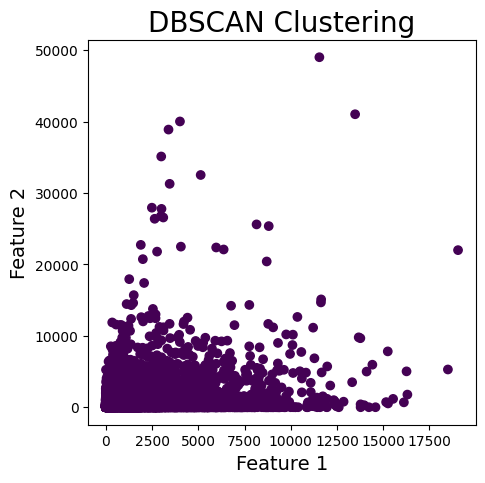

<Figure size 640x480 with 0 Axes>

In [40]:
#Melakukan visualisasi hasil klasterisasi DBSCAN menggunakan scatter plot.
plt.figure(figsize=(5,5))
plt.scatter(dbscan_['BALANCE'],dbscan_['PURCHASES'],c=dbscan_['CLUSTERS'])
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# Save Plot
plt.savefig("dbscan_graph.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')


Model Inference

In [41]:
df_deploy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Membuat DataFrame ' ' yang berisi nilai unik dari kolom " " dalam DataFrame df_deploy.

In [42]:
# BALANCE
df_cls_balance = pd.DataFrame(
    {
        "BALANCE":df_deploy["BALANCE"].unique(),
        "balance_num":df_deploy["BALANCE"].unique()
    }
).sort_values(by="balance_num", ascending=True)

df_cls_balance = df_cls_balance.set_index(keys="balance_num",drop=True)
df_cls_balance


BALANCE
balance_num               
0.000000          0.000000
0.000199          0.000199
0.001146          0.001146
0.001214          0.001214
0.001289          0.001289
...                    ...
16115.596400  16115.596400
16259.448570  16259.448570
16304.889250  16304.889250
18495.558550  18495.558550
19043.138560  19043.138560

[8871 rows x 1 columns]

In [43]:
#BALANCE FREQUENCY
df_cls_balancefreq = pd.DataFrame(
    {
        "BALANCE_FREQUENCY":df_deploy["BALANCE_FREQUENCY"].unique(),
        "balancefreq_num":df_deploy["BALANCE_FREQUENCY"].unique()
    }
).sort_values(by="balancefreq_num", ascending=True)

df_cls_balancefreq = df_cls_balancefreq.set_index(keys="balancefreq_num",drop=True)
df_cls_balancefreq


BALANCE_FREQUENCY
balancefreq_num                   
0.000000                  0.000000
0.090909                  0.090909
0.100000                  0.100000
0.111111                  0.111111
0.125000                  0.125000
0.142857                  0.142857
0.166667                  0.166667
0.181818                  0.181818
0.200000                  0.200000
0.222222                  0.222222
0.250000                  0.250000
0.272727                  0.272727
0.285714                  0.285714
0.300000                  0.300000
0.333333                  0.333333
0.363636                  0.363636
0.375000                  0.375000
0.400000                  0.400000
0.428571                  0.428571
0.444444                  0.444444
0.454545                  0.454545
0.500000                  0.500000
0.545455                  0.545455
0.555556                  0.555556
0.571429                  0.571429
0.600000                  0.600000
0.625000                  0.625000
0.636364                  0.636364
0.666667                  0.666667
0.700000                  0.700000
0.714286                  0.714286
0.727273                  0.727273
0.750000                  0.750000
0.777778                  0.777778
0.800000                  0.800000
0.818182                  0.818182
0.833333                  0.833333
0.857143                  0.857143
0.875000                  0.875000
0.888889                  0.888889
0.900000                  0.900000
0.909091                  0.909091
1.000000                  1.000000

In [44]:
#PURCHASES
df_cls_purchases = pd.DataFrame(
    {
        "PURCHASES":df_deploy["PURCHASES"].unique(),
        "purchases_num":df_deploy["PURCHASES"].unique()
    }
).sort_values(by="purchases_num", ascending=True)

df_cls_purchases = df_cls_purchases.set_index(keys="purchases_num",drop=True)
df_cls_purchases



PURCHASES
purchases_num           
0.00                0.00
0.01                0.01
0.05                0.05
0.24                0.24
0.70                0.70
...                  ...
35131.16        35131.16
38902.71        38902.71
40040.71        40040.71
41050.40        41050.40
49039.57        49039.57

[6203 rows x 1 columns]

In [45]:
#ONEOFF_PURCHASES
df_cls_ONEOFF_PURCHASES = pd.DataFrame(
    {
        "ONEOFF_PURCHASES":df_deploy["ONEOFF_PURCHASES"].unique(),
        "ONEOFF_PURCHASES_num":df_deploy["ONEOFF_PURCHASES"].unique()
    }
).sort_values(by="ONEOFF_PURCHASES_num", ascending=True)

df_cls_ONEOFF_PURCHASES = df_cls_ONEOFF_PURCHASES.set_index(keys="ONEOFF_PURCHASES_num",drop=True)
df_cls_ONEOFF_PURCHASES


ONEOFF_PURCHASES
ONEOFF_PURCHASES_num                  
0.00                              0.00
0.01                              0.01
0.02                              0.02
0.05                              0.05
0.24                              0.24
...                                ...
26547.43                      26547.43
33803.84                      33803.84
34087.73                      34087.73
40624.06                      40624.06
40761.25                      40761.25

[4014 rows x 1 columns]

In [46]:
#INSTALLMENTS_PURCHASES
df_cls_INSTALLMENTS_PURCHASES = pd.DataFrame(
    {
        "INSTALLMENTS_PURCHASES":df_deploy["INSTALLMENTS_PURCHASES"].unique(),
        "INSTALLMENTS_PURCHASES_num":df_deploy["INSTALLMENTS_PURCHASES"].unique()
    }
).sort_values(by="INSTALLMENTS_PURCHASES_num", ascending=True)

df_cls_INSTALLMENTS_PURCHASES = df_cls_INSTALLMENTS_PURCHASES.set_index(keys="INSTALLMENTS_PURCHASES_num",drop=True)
df_cls_INSTALLMENTS_PURCHASES

INSTALLMENTS_PURCHASES
INSTALLMENTS_PURCHASES_num                        
0.00                                          0.00
1.95                                          1.95
4.44                                          4.44
4.80                                          4.80
6.33                                          6.33
...                                            ...
12738.47                                  12738.47
13184.43                                  13184.43
14686.10                                  14686.10
15497.19                                  15497.19
22500.00                                  22500.00

[4452 rows x 1 columns]

In [47]:
#CASH_ADVANCE
df_cls_CASH_ADVANCE = pd.DataFrame(
    {
        "CASH_ADVANCE":df_deploy["CASH_ADVANCE"].unique(),
        "CASH_ADVANCE_num":df_deploy["CASH_ADVANCE"].unique()
    }
).sort_values(by="CASH_ADVANCE_num", ascending=True)

df_cls_CASH_ADVANCE = df_cls_CASH_ADVANCE.set_index(keys="CASH_ADVANCE_num",drop=True)
df_cls_CASH_ADVANCE


CASH_ADVANCE
CASH_ADVANCE_num              
0.000000              0.000000
14.222216            14.222216
18.042768            18.042768
18.117967            18.117967
18.123413            18.123413
...                        ...
26194.049540      26194.049540
26268.699890      26268.699890
27296.485760      27296.485760
29282.109150      29282.109150
47137.211760      47137.211760

[4323 rows x 1 columns]

In [48]:
#PURCHASES_FREQUENCY
df_cls_PURCHASES_FREQUENCY = pd.DataFrame(
    {
        "PURCHASES_FREQUENCY":df_deploy["PURCHASES_FREQUENCY"].unique(),
        "PURCHASES_FREQUENCY_num":df_deploy["PURCHASES_FREQUENCY"].unique()
    }
).sort_values(by="PURCHASES_FREQUENCY_num", ascending=True)

df_cls_PURCHASES_FREQUENCY = df_cls_PURCHASES_FREQUENCY.set_index(keys="PURCHASES_FREQUENCY_num",drop=True)
df_cls_PURCHASES_FREQUENCY

PURCHASES_FREQUENCY
PURCHASES_FREQUENCY_num                     
0.000000                            0.000000
0.083333                            0.083333
0.090909                            0.090909
0.100000                            0.100000
0.111111                            0.111111
0.125000                            0.125000
0.142857                            0.142857
0.166667                            0.166667
0.181818                            0.181818
0.200000                            0.200000
0.222222                            0.222222
0.250000                            0.250000
0.272727                            0.272727
0.285714                            0.285714
0.300000                            0.300000
0.333333                            0.333333
0.363636                            0.363636
0.375000                            0.375000
0.400000                            0.400000
0.416667                            0.416667
0.428571                            0.428571
0.444444                            0.444444
0.454545                            0.454545
0.500000                            0.500000
0.545455                            0.545455
0.555556                            0.555556
0.571429                            0.571429
0.583333                            0.583333
0.600000                            0.600000
0.625000                            0.625000
0.636364                            0.636364
0.666667                            0.666667
0.700000                            0.700000
0.714286                            0.714286
0.727273                            0.727273
0.750000                            0.750000
0.777778                            0.777778
0.800000                            0.800000
0.818182                            0.818182
0.833333                            0.833333
0.857143                            0.857143
0.875000                            0.875000
0.888889                            0.888889
0.900000                            0.900000
0.909091                            0.909091
0.916667                            0.916667
1.000000                            1.000000

In [49]:
#ONEOFF_PURCHASES_FREQUENCY
df_cls_ONEOFF_PURCHASES_FREQUENCY = pd.DataFrame(
    {
        "ONEOFF_PURCHASES_FREQUENCY":df_deploy["ONEOFF_PURCHASES_FREQUENCY"].unique(),
        "ONEOFF_PURCHASES_FREQUENCY_num":df_deploy["ONEOFF_PURCHASES_FREQUENCY"].unique()
    }
).sort_values(by="ONEOFF_PURCHASES_FREQUENCY_num", ascending=True)

df_cls_ONEOFF_PURCHASES_FREQUENCY = df_cls_ONEOFF_PURCHASES_FREQUENCY.set_index(keys="ONEOFF_PURCHASES_FREQUENCY_num",drop=True)
df_cls_ONEOFF_PURCHASES_FREQUENCY

ONEOFF_PURCHASES_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY_num                            
0.000000                                          0.000000
0.083333                                          0.083333
0.090909                                          0.090909
0.100000                                          0.100000
0.111111                                          0.111111
0.125000                                          0.125000
0.142857                                          0.142857
0.166667                                          0.166667
0.181818                                          0.181818
0.200000                                          0.200000
0.222222                                          0.222222
0.250000                                          0.250000
0.272727                                          0.272727
0.285714                                          0.285714
0.300000                                          0.300000
0.333333                                          0.333333
0.363636                                          0.363636
0.375000                                          0.375000
0.400000                                          0.400000
0.416667                                          0.416667
0.428571                                          0.428571
0.444444                                          0.444444
0.454545                                          0.454545
0.500000                                          0.500000
0.545455                                          0.545455
0.555556                                          0.555556
0.571429                                          0.571429
0.583333                                          0.583333
0.600000                                          0.600000
0.625000                                          0.625000
0.636364                                          0.636364
0.666667                                          0.666667
0.700000                                          0.700000
0.714286                                          0.714286
0.727273                                          0.727273
0.750000                                          0.750000
0.777778                                          0.777778
0.800000                                          0.800000
0.818182                                          0.818182
0.833333                                          0.833333
0.857143                                          0.857143
0.875000                                          0.875000
0.888889                                          0.888889
0.900000                                          0.900000
0.909091                                          0.909091
0.916667                                          0.916667
1.000000                                          1.000000

In [50]:
#PURCHASES_INSTALLMENTS_FREQUENCY
df_cls_PURCHASES_INSTALLMENTS_FREQUENCY = pd.DataFrame(
    {
        "PURCHASES_INSTALLMENTS_FREQUENCY":df_deploy["PURCHASES_INSTALLMENTS_FREQUENCY"].unique(),
        "PURCHASES_INSTALLMENTS_FREQUENCY_num":df_deploy["PURCHASES_INSTALLMENTS_FREQUENCY"].unique()
    }
).sort_values(by="PURCHASES_INSTALLMENTS_FREQUENCY_num", ascending=True)

df_cls_PURCHASES_INSTALLMENTS_FREQUENCY = df_cls_PURCHASES_INSTALLMENTS_FREQUENCY.set_index(keys="PURCHASES_INSTALLMENTS_FREQUENCY_num",drop=True)
df_cls_PURCHASES_INSTALLMENTS_FREQUENCY


PURCHASES_INSTALLMENTS_FREQUENCY
PURCHASES_INSTALLMENTS_FREQUENCY_num                                  
0.000000                                                      0.000000
0.083333                                                      0.083333
0.090909                                                      0.090909
0.100000                                                      0.100000
0.111111                                                      0.111111
0.125000                                                      0.125000
0.142857                                                      0.142857
0.166667                                                      0.166667
0.181818                                                      0.181818
0.200000                                                      0.200000
0.222222                                                      0.222222
0.250000                                                      0.250000
0.272727                                                      0.272727
0.285714                                                      0.285714
0.300000                                                      0.300000
0.333333                                                      0.333333
0.363636                                                      0.363636
0.375000                                                      0.375000
0.400000                                                      0.400000
0.416667                                                      0.416667
0.428571                                                      0.428571
0.444444                                                      0.444444
0.454545                                                      0.454545
0.500000                                                      0.500000
0.545455                                                      0.545455
0.555556                                                      0.555556
0.571429                                                      0.571429
0.583333                                                      0.583333
0.600000                                                      0.600000
0.625000                                                      0.625000
0.636364                                                      0.636364
0.666667                                                      0.666667
0.700000                                                      0.700000
0.714286                                                      0.714286
0.727273                                                      0.727273
0.750000                                                      0.750000
0.777778                                                      0.777778
0.800000                                                      0.800000
0.818182                                                      0.818182
0.833333                                                      0.833333
0.857143                                                      0.857143
0.875000                                                      0.875000
0.888889                                                      0.888889
0.900000                                                      0.900000
0.909091                                                      0.909091
0.916667                                                      0.916667
1.000000                                                      1.000000

In [51]:
#CASH_ADVANCE_FREQUENCY
df_cls_CASH_ADVANCE_FREQUENCY = pd.DataFrame(
    {
        "CASH_ADVANCE_FREQUENCY":df_deploy["CASH_ADVANCE_FREQUENCY"].unique(),
        "CASH_ADVANCE_FREQUENCY_num":df_deploy["CASH_ADVANCE_FREQUENCY"].unique()
    }
).sort_values(by="CASH_ADVANCE_FREQUENCY_num", ascending=True)

df_cls_CASH_ADVANCE_FREQUENCY = df_cls_CASH_ADVANCE_FREQUENCY.set_index(keys="CASH_ADVANCE_FREQUENCY_num",drop=True)
df_cls_CASH_ADVANCE_FREQUENCY


CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_FREQUENCY_num                        
0.000000                                  0.000000
0.083333                                  0.083333
0.090909                                  0.090909
0.100000                                  0.100000
0.111111                                  0.111111
0.125000                                  0.125000
0.142857                                  0.142857
0.166667                                  0.166667
0.181818                                  0.181818
0.200000                                  0.200000
0.222222                                  0.222222
0.250000                                  0.250000
0.272727                                  0.272727
0.285714                                  0.285714
0.300000                                  0.300000
0.333333                                  0.333333
0.363636                                  0.363636
0.375000                                  0.375000
0.400000                                  0.400000
0.416667                                  0.416667
0.428571                                  0.428571
0.444444                                  0.444444
0.454545                                  0.454545
0.500000                                  0.500000
0.545455                                  0.545455
0.555556                                  0.555556
0.571429                                  0.571429
0.583333                                  0.583333
0.600000                                  0.600000
0.625000                                  0.625000
0.636364                                  0.636364
0.666667                                  0.666667
0.700000                                  0.700000
0.714286                                  0.714286
0.727273                                  0.727273
0.750000                                  0.750000
0.777778                                  0.777778
0.800000                                  0.800000
0.818182                                  0.818182
0.833333                                  0.833333
0.857143                                  0.857143
0.875000                                  0.875000
0.888889                                  0.888889
0.900000                                  0.900000
0.909091                                  0.909091
0.916667                                  0.916667
1.000000                                  1.000000
1.090909                                  1.090909
1.100000                                  1.100000
1.125000                                  1.125000
1.142857                                  1.142857
1.166667                                  1.166667
1.250000                                  1.250000
1.500000                                  1.500000

In [52]:
#CASH_ADVANCE_TRX
df_cls_CASH_ADVANCE_TRX = pd.DataFrame(
    {
        "CASH_ADVANCE_TRX":df_deploy["CASH_ADVANCE_TRX"].unique(),
        "CASH_ADVANCE_TRX_num":df_deploy["CASH_ADVANCE_TRX"].unique()
    }
).sort_values(by="CASH_ADVANCE_TRX_num", ascending=True)

df_cls_CASH_ADVANCE_TRX = df_cls_CASH_ADVANCE_TRX.set_index(keys="CASH_ADVANCE_TRX_num",drop=True)
df_cls_CASH_ADVANCE_TRX


CASH_ADVANCE_TRX
CASH_ADVANCE_TRX_num                  
0                                    0
1                                    1
2                                    2
3                                    3
4                                    4
...                                ...
80                                  80
93                                  93
107                                107
110                                110
123                                123

[65 rows x 1 columns]

In [53]:
#PPURCHASES_TRX
df_cls_PURCHASES_TRX = pd.DataFrame(
    {
        "PURCHASES_TRX":df_deploy["PURCHASES_TRX"].unique(),
        "PURCHASES_TRX_num":df_deploy["PURCHASES_TRX"].unique()
    }
).sort_values(by="PURCHASES_TRX_num", ascending=True)

df_cls_PURCHASES_TRX = df_cls_PURCHASES_TRX.set_index(keys="PURCHASES_TRX_num",drop=True)
df_cls_PURCHASES_TRX 

PURCHASES_TRX
PURCHASES_TRX_num               
0                              0
1                              1
2                              2
3                              3
4                              4
...                          ...
308                          308
309                          309
344                          344
347                          347
358                          358

[173 rows x 1 columns]

In [54]:
#CREDIT_LIMIT
df_cls_CREDIT_LIMIT = pd.DataFrame(
    {
        "CREDIT_LIMIT":df_deploy["CREDIT_LIMIT"].unique(),
        "CREDIT_LIMIT_num":df_deploy["CREDIT_LIMIT"].unique()
    }
).sort_values(by="CREDIT_LIMIT_num", ascending=True)

df_cls_CREDIT_LIMIT = df_cls_CREDIT_LIMIT.set_index(keys="CREDIT_LIMIT_num",drop=True)
df_cls_CREDIT_LIMIT

CREDIT_LIMIT
CREDIT_LIMIT_num              
50.0                      50.0
150.0                    150.0
200.0                    200.0
300.0                    300.0
400.0                    400.0
...                        ...
22500.0                22500.0
23000.0                23000.0
25000.0                25000.0
28000.0                28000.0
30000.0                30000.0

[206 rows x 1 columns]

In [55]:
#PAYMENTS
df_cls_PAYMENTS = pd.DataFrame(
    {
        "PAYMENTS":df_deploy["PAYMENTS"].unique(),
        "PAYMENTS_num":df_deploy["PAYMENTS"].unique()
    }
).sort_values(by="PAYMENTS_num", ascending=True)

df_cls_PAYMENTS = df_cls_PAYMENTS.set_index(keys="PAYMENTS_num",drop=True)
df_cls_PAYMENTS


PAYMENTS
PAYMENTS_num              
0.000000          0.000000
0.049513          0.049513
0.056466          0.056466
2.389583          2.389583
3.500505          3.500505
...                    ...
39048.597620  39048.597620
39461.965800  39461.965800
40627.595240  40627.595240
46930.598240  46930.598240
50721.483360  50721.483360

[8711 rows x 1 columns]

In [56]:
#MINIMUM_PAYMENTS
df_cls_MINIMUM_PAYMENTS = pd.DataFrame(
    {
        "MINIMUM_PAYMENTS":df_deploy["MINIMUM_PAYMENTS"].unique(),
        "MINIMUM_PAYMENTS_num":df_deploy["MINIMUM_PAYMENTS"].unique()
    }
).sort_values(by="MINIMUM_PAYMENTS_num", ascending=True)

df_cls_MINIMUM_PAYMENTS = df_cls_MINIMUM_PAYMENTS.set_index(keys="MINIMUM_PAYMENTS_num",drop=True)
df_cls_MINIMUM_PAYMENTS

MINIMUM_PAYMENTS
MINIMUM_PAYMENTS_num                  
0.019163                      0.019163
0.037744                      0.037744
0.055880                      0.055880
0.059481                      0.059481
0.117036                      0.117036
...                                ...
43132.728230              43132.728230
50260.759470              50260.759470
56370.041170              56370.041170
61031.618600              61031.618600
76406.207520              76406.207520

[8637 rows x 1 columns]

In [57]:
#PRC_FULL_PAYMENT
df_cls_PRC_FULL_PAYMENT = pd.DataFrame(
    {
        "PRC_FULL_PAYMENT":df_deploy["PRC_FULL_PAYMENT"].unique(),
        "PRC_FULL_PAYMENT_num":df_deploy["PRC_FULL_PAYMENT"].unique()
    }
).sort_values(by="PRC_FULL_PAYMENT_num", ascending=True)

df_cls_PRC_FULL_PAYMENT = df_cls_PRC_FULL_PAYMENT.set_index(keys="PRC_FULL_PAYMENT_num",drop=True)
df_cls_PRC_FULL_PAYMENT


PRC_FULL_PAYMENT
PRC_FULL_PAYMENT_num                  
0.000000                      0.000000
0.083333                      0.083333
0.090909                      0.090909
0.100000                      0.100000
0.111111                      0.111111
0.125000                      0.125000
0.142857                      0.142857
0.166667                      0.166667
0.181818                      0.181818
0.200000                      0.200000
0.222222                      0.222222
0.250000                      0.250000
0.272727                      0.272727
0.285714                      0.285714
0.300000                      0.300000
0.333333                      0.333333
0.363636                      0.363636
0.375000                      0.375000
0.400000                      0.400000
0.416667                      0.416667
0.428571                      0.428571
0.444444                      0.444444
0.454545                      0.454545
0.500000                      0.500000
0.545455                      0.545455
0.555556                      0.555556
0.571429                      0.571429
0.583333                      0.583333
0.600000                      0.600000
0.625000                      0.625000
0.636364                      0.636364
0.666667                      0.666667
0.700000                      0.700000
0.714286                      0.714286
0.727273                      0.727273
0.750000                      0.750000
0.777778                      0.777778
0.800000                      0.800000
0.818182                      0.818182
0.833333                      0.833333
0.857143                      0.857143
0.875000                      0.875000
0.888889                      0.888889
0.900000                      0.900000
0.909091                      0.909091
0.916667                      0.916667
1.000000                      1.000000

In [58]:
#TENURE
df_cls_TENURE = pd.DataFrame(
    {
        "TENURE":df_deploy["TENURE"].unique(),
        "TENURE_num":df_deploy["TENURE"].unique()
    }
).sort_values(by="TENURE_num", ascending=True)

df_cls_TENURE = df_cls_TENURE.set_index(keys="TENURE_num",drop=True)
df_cls_TENURE


TENURE
TENURE_num        
6                6
7                7
8                8
9                9
10              10
11              11
12              12

In [59]:
scaler = StandardScaler()

try:
    BALANCE = float(input("BALANCE: "))
    BALANCE_FREQUENCY = float(input("BALANCE_FREQUENCY: "))
    PURCHASES = float(input("PURCHASES: "))
    ONEOFF_PURCHASES = float(input("ONEOFF_PURCHASES: "))
    INSTALLMENTS_PURCHASES = float(input("INSTALLMENTS_PURCHASES: "))
    CASH_ADVANCE = float(input("CASH_ADVANCE: "))
    PURCHASES_FREQUENCY = float(input("PURCHASES_FREQUENCY: "))
    ONEOFF_PURCHASES_FREQUENCY = float(input("ONEOFF_PURCHASES_FREQUENCY: "))
    PURCHASES_INSTALLMENTS_FREQUENCY = float(input("PURCHASES_INSTALLMENTS_FREQUENCY: "))
    CASH_ADVANCE_FREQUENCY = float(input("CASH_ADVANCE_FREQUENCY: "))
    CASH_ADVANCE_TRX = float(input("CASH_ADVANCE_TRX: "))
    PURCHASES_TRX = float(input("PURCHASES_TRX: "))
    CREDIT_LIMIT = float(input("CREDIT_LIMIT: "))
    PAYMENTS = float(input("PAYMENTS: "))
    MINIMUM_PAYMENTS = float(input("MINIMUM_PAYMENTS: "))
    PRC_FULL_PAYMENT = float(input("PRC_FULL_PAYMENT: "))
    TENURE = float(input("TENURE: "))

    feature = [
        BALANCE,
        BALANCE_FREQUENCY,
        PURCHASES,
        ONEOFF_PURCHASES,
        INSTALLMENTS_PURCHASES,
        CASH_ADVANCE,
        PURCHASES_FREQUENCY,
        ONEOFF_PURCHASES_FREQUENCY,
        PURCHASES_INSTALLMENTS_FREQUENCY,
        CASH_ADVANCE_FREQUENCY,
        CASH_ADVANCE_TRX,
        PURCHASES_TRX,
        CREDIT_LIMIT,
        PAYMENTS,
        MINIMUM_PAYMENTS,
        PRC_FULL_PAYMENT,
        TENURE
    ]

    # Scale the features using the StandardScaler
    feature = scaler.fit_transform([feature])
    
    # Make the prediction using the model
    predict = model1.predict(feature)

    print("Cluster: ", predict)
except ValueError:
    print("Invalid input. Please provide valid numerical values.")


Invalid input. Please provide valid numerical values.


In [64]:
df_deploy.head(1)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  40.900749           0.818182       95.4               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4           0.0             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  201.802084        139.509787               0.0      12

In [65]:
#menggunakan modul pickle untuk menyimpan objek model1 ke dalam file dengan nama "model_k-Means.pkl" dalam mode penulisan biner.
pickle.dump(model1, open('model_k-Means.pkl','wb'))

In [66]:
#Menggunakan modul pickle untuk menyimpan objek scaler ke dalam file dengan nama "model_scaller.pkl" dalam mode penulisan biner.
pickle.dump(scaler, open('model_scaller.pkl','wb'))


In [67]:
#Menggunakan modul pickle untuk menyimpan objek dbscan ke dalam file dengan nama "model_dbscan.pkl" dalam mode penulisan biner.
pickle.dump(dbscan, open('model_dbscan.pkl','wb'))

# Kesimpulan

Berdasarkan analisis yang telah dilakukan, dapat disimpulkan bahwa: 
- Kita dapat mengelompokkan credit card user berdasarkan model cluster yang telah dibuat.  
- Dapat mengimplementasikan algoritma lain selain K-Means yakni DBSCAN
- Kita dapa memilh any number dari cluster antara 5 - 8.  Namun untuk pengerjaan final project ini kami menggunakan n_clusters = 8 

